## Get Requirements

In [ ]:
import torch
from torchvision import transforms, datasets
import torch.nn as nn
from torch import optim as optim
import numpy as np
import matplotlib.pyplot as plt
import h5py
#import helpers
import numpy as np
from pathlib import Path
import torch
from torch.utils import data
# import cv2
import math
from PIL import Image
!pip install einops
from torch.utils.data import Dataset, DataLoader
import time
import glob
from einops import rearrange, reduce, repeat
from einops.layers.torch import Rearrange, Reduce
print(torch.__version__)

1.10.0+cu111


In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
!cd '/content/drive/MyDrive/EarEEG'

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device 

device(type='cuda')

### Neptune (Ignore this block)

In [ ]:
!pip install neptune-client

     |████████████████████████████████| 316 kB 5.3 MB/s 
     |████████████████████████████████| 829 kB 38.1 MB/s 
     |████████████████████████████████| 54 kB 2.1 MB/s 
     |████████████████████████████████| 181 kB 42.5 MB/s 
     |████████████████████████████████| 132 kB 45.5 MB/s 
     |████████████████████████████████| 8.7 MB 9.1 MB/s 
     |████████████████████████████████| 79 kB 2.3 MB/s 
     |████████████████████████████████| 138 kB 39.7 MB/s 
     |████████████████████████████████| 63 kB 1.5 MB/s 
     |████████████████████████████████| 127 kB 35.1 MB/s 
     |████████████████████████████████| 67 kB 4.0 MB/s 
     |████████████████████████████████| 130 kB 9.4 MB/s 
     |████████████████████████████████| 64 kB 1.2 MB/s 
  Created wheel for neptune-client: filename=neptune_client-0.16.0-py2.py3-none-any.whl size=565726 sha256=d34739c9737efa87ab4de91ca5c04a7e6380f8eed4766d0087d9804a2ad6200a
  Stored in directory: /root/.cache/pip/wheels/d3/96/77/26728c98b5324009116ccf98ab63768

In [ ]:
import neptune.new as neptune

# run = neptune.init(
#     project="jathurshan0330/Ear-KD",
#     api_token="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiJmYmRmNjE0Zi0xMDRkLTRlNzUtYmIxNi03NzM2ODBlZDc5NTMifQ==",
# )  # your credentials

# run = neptune.init(
#     project="jathurshan0330/Ear-Const",
#     api_token="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiJmYmRmNjE0Zi0xMDRkLTRlNzUtYmIxNi03NzM2ODBlZDc5NTMifQ==",
# )  # your credentials

# your credentials
run = neptune.init(
    project="mithunjha/KD-v2",
    api_token="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiIwZjA0YTVhOC02ZGVlLTQ0NTktOWY3NS03YzFhZWUxY2M4MTcifQ==",
) 
# run = neptune.init(
#     project="mithunjha/EarEEG",
#     api_token="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiIwZjA0YTVhOC02ZGVlLTQ0NTktOWY3NS03YzFhZWUxY2M4MTcifQ==",
# ) 

# run = neptune.init(
#     project="mithunjha/EEGcrossval",
#     api_token="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiIwZjA0YTVhOC02ZGVlLTQ0NTktOWY3NS03YzFhZWUxY2M4MTcifQ==",
# ) 

https://app.neptune.ai/mithunjha/KD-v2/e/KDV2-147
Remember to stop your run once you’ve finished logging your metadata (https://docs.neptune.ai/api-reference/run#.stop). It will be stopped automatically only when the notebook kernel/interactive console is terminated.


In [ ]:
%cd /content/
experiment = "KDV2-147"   #Change This
!mkdir "/content/drive/MyDrive/EarEEG/KDV2-147"  # Change This

/content


## Ear-EEG Data

In [ ]:
pwd

'/content'

In [ ]:
%cd /content/drive/MyDrive/EarEEG
import Datasets.sleepedf_dataset
from Datasets.sleepedf_dataset import extract_stft, read_h5py,extract_stft_multiple_epochs

In [ ]:
def split_data(data_list,train_list,val_list):
    data_list = np.array(data_list)
    train_data_list = data_list[train_list]
    val_data_list = data_list[val_list]
    return train_data_list, val_data_list

In [ ]:
train_data_list = [1,2,3,5,6,7,8]  #4 discarded 
val_data_list = [0]

psg_sig_list = glob.glob('/content/drive/MyDrive/EarEEG/x*.h5')
psg_sig_list.sort()
[train_psg_list, val_psg_list] = split_data(psg_sig_list,train_data_list,val_data_list)
print(train_psg_list)
print(val_psg_list)


label_list = glob.glob('/content/drive/MyDrive/EarEEG/y*.h5')
label_list.sort()
[train_label_list, val_label_list] = split_data(label_list,train_data_list,val_data_list)
print(train_label_list)
print(val_label_list)

mean_list = glob.glob('/content/drive/MyDrive/EarEEG/mean*.h5')
mean_list.sort()
[train_mean_list, val_mean_list] = split_data(mean_list,train_data_list,val_data_list)
print(train_mean_list)
print(val_mean_list)

sd_list = glob.glob('/content/drive/MyDrive/EarEEG/std*.h5')
sd_list.sort()
[train_sd_list, val_sd_list] = split_data(sd_list,train_data_list,val_data_list)
print(train_sd_list)
print(val_sd_list)

id_list = glob.glob('/content/drive/MyDrive/EarEEG/len*.h5')
id_list.sort()
[train_id_list, val_id_list] = split_data(id_list,train_data_list,val_data_list)
print(train_id_list)
print(val_id_list)


In [ ]:
rejection_list = read_h5py("/content/drive/MyDrive/EarEEG/rejected.h5")
print(rejection_list)

[train_reject_list, val_reject_list] = split_data(rejection_list,train_data_list,val_data_list)
print(train_reject_list)
print(val_reject_list)

## Edited

In [ ]:
def EEG_process(data,rejected_list,i=0):
    _,_,_,_,_,ELA,ELE,ELI,ERA,ERG,ERE,ERI,_,_,_,_,_,ELB,ELG,ELK,ERB,ERK,_ = data
    reject = rejected_list[i]
    ear_eeg = [ELA,ELE,ELI,ERA,ERG,ERE,ERI,ELB,ELG,ELK,ERB,ERK]
    
    for j in range (len(reject)):
        ear_eeg[j]=ear_eeg[j]*reject[j]
    

    Left_ear = (ear_eeg[0] + ear_eeg[1] + ear_eeg[2] + ear_eeg[7] + ear_eeg[8] + ear_eeg[9])/np.count_nonzero([reject[0],reject[1],reject[2],reject[7],reject[8],reject[9]])   # (ELA + ELE + ELI + ELB + ELG + ELK)/6
    Right_ear = (ear_eeg[3] + ear_eeg[4] + ear_eeg[5] + ear_eeg[6] + ear_eeg[10] + ear_eeg[11])/np.count_nonzero([reject[3],reject[4],reject[5],reject[6],reject[10],reject[11]]) # (ERA + ERG + ERE + ERI + ERB + ERK)/6
    L_R = Left_ear - Right_ear

    if np.count_nonzero([reject[0],reject[7]]) != 0 :
        L_E = (ear_eeg[0]+ear_eeg[7])/np.count_nonzero([reject[0],reject[7]]) - (ear_eeg[1]+ear_eeg[2]+ear_eeg[8]+ear_eeg[9])/np.count_nonzero([reject[1],reject[2],reject[8],reject[9]]) #(ELA + ELB)/2 - (ELE + ELI + ELG + ELK)/4
    else:
        L_E = np.zeros(data.shape[1])
    if np.count_nonzero([reject[3],reject[10]]) != 0 :
        R_E = (ear_eeg[3]+ear_eeg[10])/np.count_nonzero([reject[3],reject[10]]) - (ear_eeg[4]+ear_eeg[5]+ear_eeg[6]+ear_eeg[11])/np.count_nonzero([reject[4],reject[5],reject[6],reject[11]]) # (ERA + ERB)/2 - (ERE + ERI + ERG + ERK)/4
    else:
        R_E = np.zeros(data.shape[1])

    return L_R, L_E, R_E

In [ ]:
class EarEEG_MultiChan_Dataset(Dataset):
    def __init__(self, psg_file, label_file, device, mean_l = None, sd_l = None,
                reject_list = None, transform=None, target_transform=None, sub_wise_norm = False):
        """
      # C3,O1,A1,F3,LOC,ELA,ELE,ELI,ERA,ERG,ERE,ERI,C4,O2,A2,F4,ROC,ELB,ELG,ELK,ERB,ERK,CHIN12
        """
        # Get the data
        for i in range(len(psg_file)):
          if i == 0:
            if reject_list.any():
              psg_signal = read_h5py(psg_file[i])
              L_R, L_E, R_E = EEG_process(psg_signal,reject_list,i=i)
              # print(L_R.shape,L_E.shape,R_E.shape)
              # break
              L_R = np.reshape(L_R,(L_R.shape[0],1,L_R.shape[1]))
              L_E = np.reshape(L_E,(L_E.shape[0],1,L_E.shape[1]))
              R_E = np.reshape(R_E,(R_E.shape[0],1,R_E.shape[1]))

              # L_R = (L_R - np.mean(L_R))/np.std(L_R)
              # L_E = (L_E - np.mean(L_E))/np.std(L_E)
              # R_E = (R_E - np.mean(R_E))/np.std(R_E)

              # eeg_f3_o1 = np.reshape(psg_signal[3] - psg_signal[1],(L_R.shape[0],1,L_R.shape[-1]))
              # eeg_f4_o2 = np.reshape(psg_signal[15] - psg_signal[13],(L_R.shape[0],1,L_R.shape[-1]))
              # eeg_c3_a1 = np.reshape(psg_signal[0] - psg_signal[2],(L_R.shape[0],1,L_R.shape[-1]))
              # eeg_c4_a2 = np.reshape(psg_signal[12] - psg_signal[14],(L_R.shape[0],1,L_R.shape[-1]))
              # eeg_c3_o1 = np.reshape(psg_signal[0] - psg_signal[1],(L_R.shape[0],1,L_R.shape[-1]))
              # eeg_c4_o2 = np.reshape(psg_signal[12] - psg_signal[13],(L_R.shape[0],1,L_R.shape[-1]))
              # eeg_c3_a2 = np.reshape(psg_signal[0] - psg_signal[14],(L_R.shape[0],1,L_R.shape[-1]))
              # eeg_c4_a1 = np.reshape(psg_signal[12] - psg_signal[2],(L_R.shape[0],1,L_R.shape[-1]))
              eeg_c3_c4 = np.reshape(psg_signal[0] - psg_signal[12],(L_R.shape[0],1,L_R.shape[-1]))
              eeg_a1_a2 = np.reshape(psg_signal[2] - psg_signal[14],(L_R.shape[0],1,L_R.shape[-1]))


              eog =  np.reshape(psg_signal[16] - psg_signal[4],(L_R.shape[0],1,L_R.shape[-1]))
              # emg = np.reshape(psg_signal[22],(L_R.shape[0],1,L_R.shape[-1]))
              # self.psg = np.concatenate((L_R,eog,emg),axis = 1) 
              # self.psg = np.concatenate((L_R,L_E,R_E),axis = 1) 
              # self.psg = np.concatenate((L_R,L_E,R_E,eeg_c3_a2,eeg_c4_a1,eog),axis = 1) 
              self.psg = np.concatenate((L_R,L_E,R_E,eeg_a1_a2,eeg_c3_c4,eog),axis = 1) 
              # self.psg = np.concatenate((L_R,L_E,R_E,eeg_a1_a2,eeg_c3_a1,eeg_c4_a2),axis = 1) 

              # self.psg = np.concatenate((eeg_c3_a1,eeg_c4_a2,eog),axis = 1) 
              self.labels = read_h5py(label_file[i])
            else:  
              self.psg = read_h5py(psg_file[i])
              self.labels = read_h5py(label_file[i])
          else:
            if reject_list.any():
              psg_signal = read_h5py(psg_file[i])
              L_R, L_E, R_E = EEG_process(psg_signal,reject_list,i=i)
              L_R = np.reshape(L_R,(L_R.shape[0],1,L_R.shape[1]))
              L_E = np.reshape(L_E,(L_E.shape[0],1,L_E.shape[1]))
              R_E = np.reshape(R_E,(R_E.shape[0],1,R_E.shape[1]))

              # L_R = (L_R - np.mean(L_R))/np.std(L_R)
              # L_E = (L_E - np.mean(L_E))/np.std(L_E)
              # R_E = (R_E - np.mean(R_E))/np.std(R_E)

              # eeg_f3_o1 = np.reshape(psg_signal[3] - psg_signal[1],(L_R.shape[0],1,L_R.shape[-1]))
              # eeg_f4_o2 = np.reshape(psg_signal[15] - psg_signal[13],(L_R.shape[0],1,L_R.shape[-1]))
              # eeg_c3_a1 = np.reshape(psg_signal[0] - psg_signal[2],(L_R.shape[0],1,L_R.shape[-1]))
              # eeg_c4_a2 = np.reshape(psg_signal[12] - psg_signal[14],(L_R.shape[0],1,L_R.shape[-1]))
              # eeg_c3_o1 = np.reshape(psg_signal[0] - psg_signal[1],(L_R.shape[0],1,L_R.shape[-1]))
              # eeg_c4_o2 = np.reshape(psg_signal[12] - psg_signal[13],(L_R.shape[0],1,L_R.shape[-1]))
              eeg_c3_c4 = np.reshape(psg_signal[0] - psg_signal[12],(L_R.shape[0],1,L_R.shape[-1]))
              # eeg_c3_a2 = np.reshape(psg_signal[0] - psg_signal[14],(L_R.shape[0],1,L_R.shape[-1]))
              # eeg_c4_a1 = np.reshape(psg_signal[12] - psg_signal[2],(L_R.shape[0],1,L_R.shape[-1]))
              eeg_a1_a2 = np.reshape(psg_signal[2] - psg_signal[14],(L_R.shape[0],1,L_R.shape[-1])) ###Jathu edit


              eog =  np.reshape(psg_signal[16] - psg_signal[4],(L_R.shape[0],1,L_R.shape[-1]))   ###Jathu edit
              # emg = np.reshape(psg_signal[22],(L_R.shape[0],1,L_R.shape[-1]))
              # psg_comb = np.concatenate((L_R,eog,emg),axis = 1) 
              # psg_comb = np.concatenate((L_R,L_E,R_E),axis = 1) 
              # psg_comb = np.concatenate((L_R,L_E,R_E,eeg_c3_o1,eeg_c4_o2,eog),axis = 1) ###Jathu edit
              psg_comb = np.concatenate((L_R,L_E,R_E,eeg_a1_a2,eeg_c3_c4,eog),axis = 1) 
              # psg_comb = np.concatenate((L_R,L_E,R_E,eeg_a1_a2,eeg_c3_a1,eeg_c4_a2),axis = 1)

              # psg_comb = np.concatenate((L_R,L_E,R_E,eeg_c3_a2,eeg_c4_a1,eog),axis = 1) 
              # scalpeeg_comb = np.concatenate((eeg_c3_o1,eeg_c4_o2,eog),axis = 1) 
              # psg_comb = np.concatenate((eeg_c3_a1,eeg_c4_a2,eog),axis = 1) 

              # self.scalpeeg = np.concatenate((self.scalpeeg,scalpeeg_comb),axis = 0)
              self.psg = np.concatenate((self.psg,psg_comb),axis = 0)
              self.labels = np.concatenate((self.labels, read_h5py(label_file[i])),axis = 0)

            else:
              self.psg = np.concatenate((self.psg, read_h5py(psg_file[i])),axis = 1)
              self.labels = np.concatenate((self.labels, read_h5py(label_file[i])),axis = 0)

        self.labels = torch.from_numpy(self.labels)
        print(f"Data shape : {self.psg.shape}")
        print(f"Labels shape : {self.labels.shape}")
        bin_labels = np.bincount(self.labels)
        print(f"Labels count: {bin_labels/self.labels.shape[0]}")
        print(f"Labels count weights: {1/(bin_labels/self.labels.shape[0])}")
        
        if sub_wise_norm == True:
          print(f"Reading Subject wise mean and sd")
          for i in range(len(mean_l)):
            if i == 0:
              self.mean_l  = read_h5py(mean_l[i])
              self.sd_l = read_h5py(sd_l[i])
            else:
              self.mean_l = np.concatenate((self.mean_l, read_h5py(mean_l[i])),axis = 1)
              self.sd_l = np.concatenate((self.sd_l, read_h5py(sd_l[i])),axis = 1)

          print(f"Shapes of Mean  : {self.mean_l.shape}")
          print(f"Shapes of Sd    : {self.sd_l.shape}")
        else:     
          self.mean = mean_l
          self.sd = sd_l
          print(f"Mean : {self.mean} and SD {self.sd}")  

        self.sub_wise_norm = sub_wise_norm
        self.device = device
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        psg_data = self.psg[idx] 
        # print(psg_data.shape)
        # psg_data[0,:] = (psg_data[0,:]-np.min(psg_data[0,:]))/(np.max(psg_data[0,:])-np.min(psg_data[0,:]))    
        # psg_data[1,:] = (psg_data[1,:]-np.min(psg_data[1,:]))/(np.max(psg_data[1,:])-np.min(psg_data[1,:])) 
        # psg_data[2,:] = (psg_data[2,:]-np.min(psg_data[2,:]))/(np.max(psg_data[2,:])-np.min(psg_data[2,:])) 
        # psg_data[3,:] = (psg_data[3,:]-np.min(psg_data[3,:]))/(np.max(psg_data[3,:])-np.min(psg_data[3,:]))    
        # psg_data[4,:] = (psg_data[4,:]-np.min(psg_data[4,:]))/(np.max(psg_data[4,:])-np.min(psg_data[4,:])) 
        # psg_data[5,:] = (psg_data[5,:]-np.min(psg_data[5,:]))/(np.max(psg_data[5,:])-np.min(psg_data[5,:])) 
  
        # eeg_data = self.scalpeeg[idx]   
        # print(data.shape)
        label = self.labels[idx,]
        
        if self.sub_wise_norm ==True:
          psg_data = (psg_data - self.mean_l[idx]) / self.sd_l[idx]
        elif self.mean and self.sd:
          psg_data = (psg_data - self.mean_l) / self.sd_l

        if self.transform:
            psg_data = self.transform(psg_data)
            # eeg_data = self.transform(eeg_data)
        if self.target_transform:
            label = self.target_transform(label)
        return psg_data, label

In [ ]:
train_dataset = EarEEG_MultiChan_Dataset(psg_file = train_psg_list, 
                                       label_file = train_label_list, device = device, 
                                    #    mean_l = val_mean_list, sd_l = val_sd_list,###Jathu
                                       reject_list = train_reject_list,
                                       sub_wise_norm = False,###Jathu
                                       transform=transforms.Compose([
                                        transforms.ToTensor(),
                                        # #  transforms.Normalize(
                                        #     (0.5,), (0.5,))
                                        ]) )
val_dataset = EarEEG_MultiChan_Dataset(psg_file = val_psg_list, 
                                       label_file = val_label_list, device = device, 
                                    #    mean_l = val_mean_list, sd_l = val_sd_list,###Jathu
                                       reject_list = val_reject_list,###Jathu
                                       sub_wise_norm = False,
                                       transform=transforms.Compose([
                                        transforms.ToTensor(),
                                        # #  transforms.Normalize(
                                        #     (0.5,), (0.5,))
                                        ]) )

In [ ]:
batch_size = 32
train_data_loader = data.DataLoader(train_dataset, batch_size = batch_size, shuffle = True)
val_data_loader = data.DataLoader(val_dataset, batch_size = batch_size, shuffle = True)

In [ ]:
psg_data, label = next(iter(train_data_loader))
print(f"PSG batch shape: {psg_data.size()}")
print(f"Labels batch shape: {label.size()}")

t = np.arange(0,30,1/200)

plt.figure(figsize = (40,20))
plt.subplot(3, 2, 1)
plt.plot(t,(psg_data[0,0,0,:]/psg_data[0,0,0,:].max()).squeeze(),'k',linewidth=2)
plt.title("Ear EEG : L-R",fontsize = 30)
plt.ylim((-5,5))
# plt.ticks('off')
# plt.show()

plt.subplot(3, 2, 3)
# plt.figure(figsize = (20,10))
plt.plot(t,(psg_data[0,0,1,:]/psg_data[0,0,1,:].max()).squeeze(),'k',linewidth=2)
plt.title("Ear EEG : L",fontsize = 30)
plt.ylim((-5,5))
# plt.show()
plt.subplot(3, 2, 5)
# plt.figure(figsize = (20,10))
plt.plot(t,(psg_data[0,0,2,:]/psg_data[0,0,2,:].max()).squeeze(),'k',linewidth=2)
plt.title("Ear EEG : R",fontsize = 30)
plt.ylim((-5,5))
# plt.show()

plt.subplot(3, 2, 2)
# plt.figure(figsize = (20,10))6 C301
plt.plot(t,(psg_data[0,0,3,:]/psg_data[0,0,3,:].max()).squeeze(),'k',linewidth=2)
plt.title("Scalp EEG : A1-A2",fontsize = 30)
plt.ylim((-5,5))
# plt.ylim((-200,200))
# plt.show()

plt.subplot(3, 2, 4)
# plt.figure(figsize = (20,10))2,c4o2
plt.plot(t,(psg_data[0,0,4,:]/psg_data[0,0,4,:].max()).squeeze(),'k',linewidth=2)
plt.title("Scalp EEG : C3-O1",fontsize = 30)
plt.ylim((-5,5))
# plt.ylim((-200,200))
# plt.show()

plt.subplot(3, 2, 6)
# plt.figure(figsize = (20,10))4, a1a2
plt.plot(t,(psg_data[0,0,5,:]/psg_data[0,0,5,:].max()).squeeze(),'k',linewidth=2)
plt.title("Scalp EEG : C4-O2",fontsize = 30)
plt.ylim((-5,5))
# plt.ylim((-200,200))
plt.show()

# plt.title(f"Label {label[0].squeeze()}")



print(f"EarEEG Minimum :{psg_data[0,0,0,:].min()}")
print(f"EarEEG Maximum :{psg_data[0,0,0,:].max()}")
print(f"EOG Minimum :{psg_data[0,0,1,:].min()}")
print(f"EOG Maximum :{psg_data[0,0,1,:].max()}")
print(f"EMG Minimum :{psg_data[0,0,2,:].min()}")
print(f"EMG Maximum :{psg_data[0,0,2,:].max()}")


print(f"EarEEG Mean :{torch.mean(psg_data[0,0,0,:])}")
print(f"EarEEG Standard Deviation :{torch.std(psg_data[0,0,0,:])}")
print(f"EOG Mean :{torch.mean(psg_data[0,0,1,:])}")
print(f"EOG Standard Deviation :{torch.std(psg_data[0,0,1,:])}")
print(f"EMG Mean :{torch.mean(psg_data[0,0,2,:])}")
print(f"EMG Standard Deviation :{torch.std(psg_data[0,0,2,:])}")


psg_data, label = next(iter(val_data_loader))
print(f"PSG batch shape: {psg_data.size()}")
print(f"Labels batch shape: {label.size()}")

t = np.arange(0,30,1/200)
plt.figure(figsize = (20,10))
plt.plot(t,psg_data[0,0,0,:].squeeze())
plt.plot(t,psg_data[0,0,1,:].squeeze())
plt.plot(t,psg_data[0,0,2,:].squeeze())
plt.show()
plt.figure(figsize = (20,10))
plt.plot(t,psg_data[0,0,3,:].squeeze())
plt.plot(t,psg_data[0,0,4,:].squeeze())
plt.plot(t,psg_data[0,0,5,:].squeeze())
plt.title(f"Label {label[0].squeeze()}")
plt.show()


print(f"EarEEG Minimum :{psg_data[0,0,0,:].min()}")
print(f"EarEEG Maximum :{psg_data[0,0,0,:].max()}")
print(f"EOG Minimum :{psg_data[0,0,1,:].min()}")
print(f"EOG Maximum :{psg_data[0,0,1,:].max()}")
print(f"EMG Minimum :{psg_data[0,0,2,:].min()}")
print(f"EMG Maximum :{psg_data[0,0,2,:].max()}")


print(f"EarEEG Mean :{torch.mean(psg_data[0,0,0,:])}")
print(f"EarEEG Standard Deviation :{torch.std(psg_data[0,0,0,:])}")
print(f"EOG Mean :{torch.mean(psg_data[0,0,1,:])}")
print(f"EOG Standard Deviation :{torch.std(psg_data[0,0,1,:])}")
print(f"EMG Mean :{torch.mean(psg_data[0,0,2,:])}")
print(f"EMG Standard Deviation :{torch.std(psg_data[0,0,2,:])}")



### Classification Model Cross Transformer

In [ ]:
import copy
from typing import Optional, Any

import torch
from torch import Tensor
import torch.nn as nn
from torch.nn import functional as F
from torch.nn import Module
from torch.nn import MultiheadAttention
from torch.nn import ModuleList
from torch.nn.init import xavier_uniform_
from torch.nn import Dropout
from torch.nn import Linear
from torch.nn import LayerNorm

In [ ]:
def _get_clones(module, N):
    return ModuleList([copy.deepcopy(module) for i in range(N)])


def _get_activation_fn(activation):
    if activation == "relu":
        return F.relu
    elif activation == "gelu":
        return F.gelu

    raise RuntimeError("activation should be relu/gelu, not {}".format(activation))

class PositionalEncoding(nn.Module):

    def __init__(self, d_model: int, dropout: float = 0.1, max_len: int = 5000):
        super().__init__()
        self.dropout = nn.Dropout(p=dropout)

        position = torch.arange(max_len).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2) * (-math.log(10000.0) / d_model))
        pe = torch.zeros(max_len, 1, d_model)
        pe[:, 0, 0::2] = torch.sin(position * div_term)
        pe[:, 0, 1::2] = torch.cos(position * div_term)
        self.register_buffer('pe', pe)

    def forward(self, x: Tensor) -> Tensor:
        """
        Args:
            x: Tensor, shape [seq_len, batch_size, embedding_dim]
        """
        x = x + self.pe[:x.size(0)]
        return self.dropout(x)

In [ ]:
#input ==> 32, 1, 1, 3000,, b==> batch, e==> embedding, s==> seq length
class Window_Embedding(nn.Module): 
    def __init__(self, in_channels: int = 1, window_size: int = 50, emb_size: int = 64):
        super(Window_Embedding, self).__init__()

        self.projection_1 =  nn.Sequential(
            # using a conv layer instead of a linear one -> performance gains, in=>B,1,3000 out=>B,64,60
            nn.Conv1d(in_channels, emb_size//4, kernel_size = window_size, stride = window_size),
            nn.LeakyReLU(),
            nn.BatchNorm1d(emb_size//4),
            # Rearrange('b e s -> b s e'),
            )
        self.projection_2 =  nn.Sequential(#################
            # using a conv layer instead of a linear one -> performance gains, in=>B,1,3000 out=>B,64,60
            nn.Conv1d(in_channels, emb_size//8, kernel_size = 5, stride = 5),
            nn.LeakyReLU(),
            nn.Conv1d(emb_size//8, emb_size//4, kernel_size = 5, stride = 5),
            nn.LeakyReLU(),
            nn.Conv1d(emb_size//4, (emb_size-emb_size//4)//2, kernel_size = 2, stride = 2),
            nn.LeakyReLU(),
            nn.BatchNorm1d((emb_size-emb_size//4)//2),
            # Rearrange('b e s -> b s e'),
            )
        
        self.projection_3 =  nn.Sequential(#################
            # using a conv layer instead of a linear one -> performance gains, in=>B,1,3000 out=>B,64,60
            nn.Conv1d(in_channels, emb_size//4, kernel_size = 25, stride = 25),
            nn.LeakyReLU(),
            nn.Conv1d(emb_size//4, (emb_size-emb_size//4)//2, kernel_size =2, stride = 2),
            nn.LeakyReLU(),
            nn.BatchNorm1d((emb_size-emb_size//4)//2),
            # Rearrange('b e s -> b s e'),
            )
        
        
        self.projection_4 = nn.Sequential(
            # using a conv layer instead of a linear one -> performance gains, in=>B,1,3000 out=>B,64,60
            nn.Conv1d(emb_size, emb_size, kernel_size = 1, stride = 1),
            nn.LeakyReLU(),
            nn.BatchNorm1d(emb_size),
            Rearrange('b e s -> b s e'),)
            
        #in=>B,64,60 out=>B,64,61
        self.cls_token = nn.Parameter(torch.randn(1,1, emb_size))
        self.arrange1 = Rearrange('b s e -> s b e')
        #in=>61,B,64 out=>61,B,64
        self.pos = PositionalEncoding(d_model=emb_size)
        #in=>61,B,64 out=>B,61,64
        self.arrange2 = Rearrange('s b e -> b s e ')

    def forward(self, x: Tensor) -> Tensor:
        x = x.squeeze().unsqueeze(dim = 1)
        # print(x.shape)
        b,_, _ = x.shape
        x_1 = self.projection_1(x)  ########################
        x_2 = self.projection_2(x) ###########
        x_3 = self.projection_3(x) 
        # print(x_local.shape,x_global.shape)
        x = torch.cat([x_1,x_2,x_3],dim = 1)##### 2)
        x = self.projection_4(x) 
        # print(x.shape)
        cls_tokens = repeat(self.cls_token, '() s e -> b s e', b=b)
        # print(cls_tokens.shape)
        # prepend the cls token to the input
        x = torch.cat([cls_tokens, x], dim=1)
        # print(x.shape)
        # add position embedding
        x = self.arrange1(x)
        # print(x.shape)
        x = self.pos(x)
        # print(x.shape)
        x = self.arrange2(x)
        # print(x.shape)
        return x

In [ ]:
#input ==>(b,s,e)=>(32, 61, 64,) 
# b==> batch, s==> seq length, e==> embedding, 
class Intra_modal_atten(nn.Module): 
    def __init__(self, d_model=64, nhead=8, dropout=0.1,
                 layer_norm_eps=1e-5, window_size = 25, First = True,
                 device=None, dtype=None) -> None:
        super(Intra_modal_atten, self).__init__()
        factory_kwargs = {'device': device, 'dtype': dtype}
       
        if First == True:
            self.window_embed = Window_Embedding(in_channels = 1, window_size = window_size, emb_size = d_model)
        self.norm = LayerNorm(d_model, eps=layer_norm_eps, **factory_kwargs)  
        self.self_attn = MultiheadAttention(d_model, nhead, dropout=dropout, batch_first=True,
                                            **factory_kwargs)
        self.dropout = Dropout(dropout) 
        self.First = First

    def forward(self, x: Tensor) -> Tensor:
        if self.First == True:
            src = self.window_embed(x)
        else:
            src = x
        # print(src.shape)
        # src = self.norm(src)  #####
        # print(src.shape)
        src2 = self.self_attn(src, src, src)[0]
        # print(src2.shape)
        out = src + self.dropout(src2)
        out = self.norm(out)   ########
        return out                              

In [ ]:
##Cross Modal Attention
#input ==>(b,s,e)=>(32, 2, 64,) ==> Class tokens of EEG and EOG after intra modal attention
# b==> batch, s==> seq length, e==> embedding, 
class Cross_modal_atten(nn.Module): 
    def __init__(self, d_model=64, nhead=8, dropout=0.1,
                 layer_norm_eps=1e-5, First = False,
                 device=None, dtype=None) -> None:

        super(Cross_modal_atten, self).__init__()
        factory_kwargs = {'device': device, 'dtype': dtype}

        if First == True:
            self.cls_token = nn.Parameter(torch.randn(1,1, d_model)) ######
        self.norm = LayerNorm(d_model, eps=layer_norm_eps, **factory_kwargs)  
        self.cross_attn = MultiheadAttention(d_model, nhead, dropout=dropout, batch_first=True,
                                            **factory_kwargs)
        self.dropout = Dropout(dropout) 
        self.First = First

    def forward(self, x1: Tensor,x2: Tensor) -> Tensor:
        # print(x1.shape,x2.shape)
        if len(x1.shape) == 2:
            x = torch.cat([x1.unsqueeze(dim=1), x2.unsqueeze(dim=1)], dim=1)
        else:
            x = torch.cat([x1, x2.unsqueeze(dim=1)], dim=1)
        # print(x.shape)
        b,_, _ = x.shape
        if self.First == True:
            cls_tokens = repeat(self.cls_token, '() s e -> b s e', b=b)  ######
            # print(cls_tokens.shape)
            # prepend the cls token to the input
            src = torch.cat([cls_tokens, x], dim=1)  #####
        else:
            src = x
        # print(src.shape)
        # src = self.norm(src)#####(src)
        # print(src.shape)
        src2 = self.cross_attn(src, src, src)[0]
        # print(src2.shape)
        out = src + self.dropout(src2)
        out = self.norm(out)
        return out  

In [ ]:
##Feed Forward Networks
#input ==>(b,s,e)=>(32, 61, 64,) 
# b==> batch, s==> seq length, e==> embedding, 
class Feed_forward(nn.Module): 
    def __init__(self, d_model=64,dropout=0.1,dim_feedforward=512,
                 layer_norm_eps=1e-5,
                 device=None, dtype=None) -> None:

        super(Feed_forward, self).__init__()
        factory_kwargs = {'device': device, 'dtype': dtype}

        self.norm = LayerNorm(d_model, eps=layer_norm_eps, **factory_kwargs)
        self.linear1 = Linear(d_model, dim_feedforward, **factory_kwargs)
        self.relu = nn.ReLU()
        self.dropout1 = Dropout(dropout)
        self.linear2 = Linear(dim_feedforward, d_model, **factory_kwargs)
        self.dropout2 = Dropout(dropout)
        
    def forward(self, x: Tensor) -> Tensor:
        # print(x.shape)
        # src = self.norm(x)  ######
        src = x
        # print(src.shape)
        src2 = self.linear2(self.dropout1(self.relu(self.linear1(src))))
        # print(src2.shape)
        out = src + self.dropout2(src2)
        out = self.norm(out)
        return out

In [ ]:
# # Best Model so far fine tuning
# class Cross_Transformer_Network(nn.Module):
#     def __init__(self,d_model = 64, dim_feedforward=512,window_size = 25): #  filt_ch = 4
#         super(Cross_Transformer_Network, self).__init__()
        
#         self.eeg_atten = Intra_modal_atten(d_model=d_model, nhead=8, dropout=0.1,
#                                             window_size =window_size, First = True )
#         self.eog_atten = Intra_modal_atten(d_model=d_model, nhead=8, dropout=0.1, 
#                                             window_size =window_size, First = True )
#         self.eeg2_atten = Intra_modal_atten(d_model=d_model, nhead=8, dropout=0.1, 
#                                             window_size =window_size, First = True )
        
#         self.cross_atten = Cross_modal_atten(d_model=d_model, nhead=8, dropout=0.1, First = False )
        
#         self.cross_ff= Feed_forward(d_model = d_model,dropout=0.1,dim_feedforward = dim_feedforward)
#         # self.eog_ff = Feed_forward(d_model = d_model,dropout=0.1,dim_feedforward = dim_feedforward)
#         # self.eeg2_ff = Feed_forward(d_model = d_model,dropout=0.1,dim_feedforward = dim_feedforward)



#         self.mlp    = nn.Sequential(nn.Flatten(),
#                                     nn.Linear(d_model*3,5))  ##################
#         # 

#     def forward(self, eeg: Tensor,eog: Tensor,eeg2: Tensor,finetune = True): 
#         self_eeg = self.eeg_atten(eeg)
#         self_eog = self.eog_atten(eog)
#         self_eeg2 = self.eeg2_atten(eeg)
#         # print(self_eeg.shape,self_eeg2.shape)
#         self_eeg_new = torch.cat((self_eeg[:,0,:].unsqueeze(dim=1),self_eeg2[:,0,:].unsqueeze(dim=1)), dim=1)
#         cross = self.cross_atten(self_eeg_new,self_eog[:,0,:])

#         cross_cls = cross[:,0,:].unsqueeze(dim=1)
#         cross_eeg = cross[:,1,:].unsqueeze(dim=1)
#         cross_eog = cross[:,2,:].unsqueeze(dim=1)

#         # eeg_new =  torch.cat([cross_cls, self_eeg[:,1:,:]], dim=1)
#         # eog_new =  torch.cat([cross_cls, self_eog[:,1:,:]], dim=1)
#         # eeg2_new =  torch.cat([cross_cls, self_eeg2[:,1:,:]], dim=1)

#         ff_cross =  self.cross_ff(cross)
#         # ff_eog = self.eog_ff(eog_new)
#         # ff_eeg2 = self.eeg2_ff(eeg2_new)

        

#         # cls_out = torch.cat([cross_cls[:,0,:],ff_eeg[:,0,:], ff_eog[:,0,:]], dim=1).unsqueeze(dim=1) ######
#         # cls_out = #torch.cat([ff_eeg[:,0,:], ff_eog[:,0,:],ff_eeg2[:,0,:]], dim=1).unsqueeze(dim=1) 

#         feat_list = [ff_cross,self_eeg,self_eog,self_eeg2]
#         if finetune == True:
#             out = self.mlp(ff_cross)  #########
#             return out,ff_cross,feat_list
#         else:
#             return ff_cross[:,0,:]#feat_list

In [ ]:
# Best Model so far fine tuning
class Cross_Transformer_Network(nn.Module):
    def __init__(self,d_model = 64, dim_feedforward=512,window_size = 25): #  filt_ch = 4
        super(Cross_Transformer_Network, self).__init__()
        
        self.eeg_atten = Intra_modal_atten(d_model=d_model, nhead=8, dropout=0.1,
                                            window_size =window_size, First = True )
        self.eog_atten = Intra_modal_atten(d_model=d_model, nhead=8, dropout=0.1, 
                                            window_size =window_size, First = True )
        self.eeg2_atten = Intra_modal_atten(d_model=d_model, nhead=8, dropout=0.1, 
                                            window_size =window_size, First = True )
        
        self.cross_atten = Cross_modal_atten(d_model=d_model, nhead=8, dropout=0.1, First = True )
        
        self.eeg_ff = Feed_forward(d_model = d_model,dropout=0.1,dim_feedforward = dim_feedforward)
        self.eog_ff = Feed_forward(d_model = d_model,dropout=0.1,dim_feedforward = dim_feedforward)
        self.eeg2_ff = Feed_forward(d_model = d_model,dropout=0.1,dim_feedforward = dim_feedforward)



        self.mlp    = nn.Sequential(nn.Flatten(),
                                    nn.Linear(d_model*3,5))  ##################
        # 

    def forward(self, eeg: Tensor,eog: Tensor,eeg2: Tensor,finetune = True): 
        self_eeg = self.eeg_atten(eeg)
        self_eog = self.eog_atten(eog)
        self_eeg2 = self.eeg2_atten(eeg)
        # print(self_eeg.shape,self_eeg2.shape)
        self_eeg_new = torch.cat((self_eeg[:,0,:].unsqueeze(dim=1),self_eeg2[:,0,:].unsqueeze(dim=1)), dim=1)
        cross = self.cross_atten(self_eeg_new,self_eog[:,0,:])

        cross_cls = cross[:,0,:].unsqueeze(dim=1)
        cross_eeg = cross[:,1,:].unsqueeze(dim=1)
        cross_eog = cross[:,2,:].unsqueeze(dim=1)

        eeg_new =  torch.cat([cross_cls, self_eeg[:,1:,:]], dim=1)
        eog_new =  torch.cat([cross_cls, self_eog[:,1:,:]], dim=1)
        eeg2_new =  torch.cat([cross_cls, self_eeg2[:,1:,:]], dim=1)

        ff_eeg = self.eeg_ff(eeg_new)
        ff_eog = self.eog_ff(eog_new)
        ff_eeg2 = self.eeg2_ff(eeg2_new)

        

        # cls_out = torch.cat([cross_cls[:,0,:],ff_eeg[:,0,:], ff_eog[:,0,:]], dim=1).unsqueeze(dim=1) ######
        cls_out = torch.cat([ff_eeg[:,0,:], ff_eog[:,0,:],ff_eeg2[:,0,:]], dim=1).unsqueeze(dim=1) 

        feat_list = [cross_cls,ff_eeg,ff_eog,ff_eeg2]
        if finetune == True:
            out = self.mlp(cls_out)  #########
            return out,cls_out,feat_list
        else:
            return cls_out#feat_list

### Model Training

In [ ]:
# # teacher model - using c4 o2 eeg channel
# Net_t = torch.load('/home/jathu/fyp_g15_sleep_monitoring/Experiments/Ear_EEG/EAREEG-29/checkpoint_model_epoch_17.pth.tar')
# # ear EEG model - using L, R, EOG
# Net_s = torch.load('/home/jathu/fyp_g15_sleep_monitoring/Experiments/Ear_EEG/EAREEG-39/checkpoint_model_epoch_44.pth.tar')


# Net_t = Cross_Transformer_Network(d_model = d_model, dim_feedforward=dim_feedforward,
#                                 window_size = window_size ).to(device)
# Net_s = torch.load('/home/jathu/fyp_g15_sleep_monitoring/Experiments/Sleep_edfx/V2-Cros-48/checkpoint_model_best_kappa.pth.tar').to(device)

In [ ]:
import torch.optim as optim

d_model = 256
dim_feedforward=1024  #
window_size = 50#25 50

# Net_t = torch.load('/content/drive/MyDrive/EarEEG/EAREEGV2-121/checkpoint_model_epoch_best_kappa2.pth.tar').to(device)
# Net_s = torch.load('/content/drive/MyDrive/EarEEG/EARCMT-58/checkpoint_model_epoch_best_kappa2.pth.tar').to(device)
Net_t = Cross_Transformer_Network(d_model = d_model, dim_feedforward=dim_feedforward, window_size = window_size).to(device)
Net_s = Cross_Transformer_Network(d_model = d_model, dim_feedforward=dim_feedforward, window_size = window_size).to(device)


lr = 0.001#0.001
beta_1 =  0.9    
beta_2 =  0.999    
eps = 1e-9
n_epochs = 100

criterion_mse =  nn.MSELoss()

optimizer_t = torch.optim.Adam(Net_t.parameters(), lr=lr, betas=(beta_1, beta_2),eps = eps)
optimizer_s = torch.optim.Adam(Net_s.parameters(), lr=lr, betas=(beta_1, beta_2),eps = eps)
criterion_ce = nn.CrossEntropyLoss()


psg_data, label = next(iter(train_data_loader))
pred1,cls_outs,feat_list = Net_s(psg_data[:,:,0,:].float().to(device), psg_data[:,:,1,:].float().to(device), psg_data[:,:,2,:].float().to(device),finetune = True)
print(pred1.shape,cls_outs.shape,len(feat_list))

pred2,cls_outs,feat_list = Net_t(psg_data[:,:,3,:].float().to(device), psg_data[:,:,4,:].float().to(device), psg_data[:,:,5,:].float().to(device),finetune = True)
print(pred2.shape,cls_outs.shape,len(feat_list))


In [ ]:
# import torch.nn.functional as F
# class MSE_Loss(nn.Module):
#     def __init__(self):
#         super(MSE_Loss, self).__init__()
#         self.criterion = nn.MSELoss(size_average=True)
      
#     def forward(self, pred, target, T):
#       pred = pred/T
#       pred = F.softmax(pred, dim=0)
#       # print(pred.shape)
#       target = target/T
#       target = F.softmax(target, dim=0)
#       # print(target.shape)
#       loss = self.criterion(pred,target)
#       return loss 

# soft_loss = MSE_Loss()

In [ ]:
# print(soft_loss(pred1,pred2,2))

In [ ]:
parameters = {
    "Experiment" : "Cross Modal Transformer",
    'Model Type' : "Const-learn - scalp to EarEEG (teach pretrained, student start from teach weigths)",
    'Signals' : "ScalpEEG - A1A2, C3C4, EOG, EarEEG - L,R,L-R",
    'Subject' : val_data_list[0]+1,
    'd_model' : d_model,
    'dim_feedforward' : dim_feedforward,
    'window_size ':window_size ,
    'Batch Size': batch_size,
    'Loss': f"Weighted Categorical Loss",  # Check this every time
    'Optimizer' : "Adam",        # Check this every time   
    'Learning Rate': lr,
    'eps' : eps,
    "LR Schduler": "StepLR",
    'Beta 1': beta_1,
    'Beta 2': beta_2,
    'n_epochs': n_epochs,
    'Subject' : val_data_list[0]+1,
    'threshold': 0.5
}
run['model/parameters'] = parameters
run['model/model_architecture'] = Net_s

### Metrics

In [ ]:
from torch.autograd import Variable
from sklearn.metrics import cohen_kappa_score

def accuracy(outputs, labels):
    pred = torch.argmax(outputs, 1)

    # print(pred)
    correct = pred.eq(labels.view_as(pred)).sum().item()
    total = int(labels.shape[0])
    return correct / total

def kappa(output, label):  
  preds = torch.argmax(output, 1)
  return cohen_kappa_score(label, preds)


def g_mean(sensitivity, specificity):
    return (sensitivity*specificity)**0.5



In [ ]:
# batch_size = 10 # nb_samples
# n_classes = 4
# output = torch.randn(batch_size,5) # refer to output after softmax
# lab = torch.randn(batch_size,5) # labels
# #print(label)


def confusion_matrix(output, label, n_classes,  batch_size, print_conf_mat = False):

    preds = torch.argmax(output, 1)
  
    # print(preds)
    # print(label)
    conf_matrix = torch.zeros(n_classes, n_classes)
    avg_sensitivity = 0
    avg_specificity = 0
    avg_F1_score = 0
    avg_precision = 0
    sens_list = []
    spec_list = []
    F1_list = []
    precision_list = []

    for p, t in zip(preds, label):
        conf_matrix[p, t] += 1
    # if print_conf_mat==True:    ##Jathu made this edit
    #   print(conf_matrix)

    #   plot_confusion_matrix(cm = conf_matrix.cpu().numpy(),
    #                   normalize    = True,
    #                   target_names = ['Wake', 'N1', 'N2','N3','REM'],
    #                   title        = "Confusion Matrix (5-Class)")

    #   plt.show()

    TP = conf_matrix.diag()
    for c in range(n_classes):
        idx = torch.ones(n_classes).byte()
        idx[c] = 0
        TN = conf_matrix[idx.nonzero()[:,None], idx.nonzero()].sum()
        FP = conf_matrix[c, idx].sum()
        FN = conf_matrix[idx, c].sum()

        if (TP[c]+FN) != 0:
          sensitivity = (TP[c] / (TP[c]+FN))
        else:
          sensitivity = 0

        if (TN+FP) != 0:
          specificity = (TN / (TN+FP))
        else:
          specificity = 0

        if ((2*TP[c]) + (FN + FP)) !=0:
          F1_score = (2*TP[c])/((2*TP[c]) + (FN + FP))
        else:
          F1_score = 0
        
        if (TP[c]+FP) !=0:
          precision = (TP[c]/(TP[c]+FP))
        else:
          precision = 0


        sens_list.append(float(sensitivity))
        spec_list.append(float(specificity))
        F1_list.append(float(F1_score))
        precision_list.append(float(precision))

        avg_sensitivity += float(sensitivity)
        avg_specificity += float(specificity)
        avg_F1_score += float(F1_score)
        avg_precision +=float(precision)

        # print('Class {}\nTP {}, TN {}, FP {}, FN {}'.format(c, TP[c], TN, FP, FN))
        # print('Sensitivity = {}'.format(sensitivity))
        # print('Specificity = {}'.format(specificity))
    return sens_list, spec_list,F1_list, precision_list, avg_sensitivity/5, avg_specificity/5, avg_F1_score/5, avg_precision/5 

# confusion_matrix(output, lab,5,batch_size)

In [ ]:
class AverageMeter(object):
    """Computes and stores the average and current value"""
    def __init__(self):
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count if self.count != 0 else 0

# Constrastive Learning

In [ ]:
# Training the model
import warnings
warnings.filterwarnings("ignore")

best_val_acc = 0
best_val_kappa = 0
for epoch_idx in range(n_epochs):  # loop over the dataset multiple times
    # run['train/epoch/learning_Rate'].log(optimizer.param_groups[0]["lr"]) 
    Net_s.train()
    Net_t.train()        ### Check whether weights of the teacher gets updated
    print(f'===========================================================Training Epoch : [{epoch_idx+1}/{n_epochs}] ===========================================================================================================>')
    batch_time = AverageMeter()
    data_time = AverageMeter()
    
    losses_t = AverageMeter()
    losses_s = AverageMeter()
    val_t_losses = AverageMeter()
    val_s_losses = AverageMeter()
    
    train_t_accuracy = AverageMeter()
    train_s_accuracy = AverageMeter()
    val_t_accuracy = AverageMeter()
    val_s_accuracy = AverageMeter()

    train_t_kappa = AverageMeter()
    train_s_kappa = AverageMeter()
    val_t_kappa = AverageMeter()
    val_s_kappa = AverageMeter()

    end = time.time()

    for batch_idx, data_input in enumerate(train_data_loader):
        # get the inputs; data is a list of [inputs, labels]
        data_time.update(time.time() - end)
        psg, labels = data_input
        sig1 = psg[:,:,0,:]# L-R
        sig2 = psg[:,:,1,:]# L
        sig3 = psg[:,:,2,:]# R
        sig4 = psg[:,:,3,:]# c3-01
        sig5 = psg[:,:,4,:]# c4-o2
        sig6 = psg[:,:,5,:]# eog
        cur_batch_size = len(sig1)
        
        # zero the parameter gradients
        
       
        # Temp = 1.2 #1.5
        # alpha = 1e3
        targets,cls_t_feat,_ = Net_t(sig4.float().to(device), sig5.float().to(device), sig6.float().to(device),finetune = True)
        
        
        outputs,cls_s_feat,_ = Net_s(sig1.float().to(device), sig2.float().to(device), sig3.float().to(device),finetune = True)

        loss_t =  criterion_ce(targets.cpu(),labels) #+ criterion_mse(cls_s_feat.cpu(), cls_t_feat.cpu())
        loss_s =  criterion_ce(outputs.cpu(),labels) + criterion_mse(cls_s_feat.cpu(), cls_t_feat.detach().cpu())
        # loss_s =  alpha*criterion_ce(outputs.cpu(),labels) + (1-alpha)*soft_loss(outputs,targets, Temp)
        # loss_s =  criterion_ce(outputs.cpu(),labels) + soft_loss(cls_s_feat.cpu(),cls_t_feat.detach().cpu(), Temp)



        # loss = loss_function(outputs.cpu(), targets.cpu(),weights)
        
        optimizer_t.zero_grad()
        
        loss_t.backward()
        optimizer_t.step()
        # scheduler.step()
        optimizer_s.zero_grad()
        loss_s.backward()
        optimizer_s.step()
        
        
        
        
        losses_t.update(loss_t.data.item())
        losses_s.update(loss_s.data.item())

        train_t_accuracy.update(accuracy(targets.cpu(), labels))
        train_s_accuracy.update(accuracy(outputs.cpu(), labels))

        train_t_kappa.update(kappa(targets.cpu(), labels))
        train_s_kappa.update(kappa(outputs.cpu(), labels))
        # print(outputs.shape, labels.shape)

        run['train/epoch/batch_t_loss'].log(losses_t.val)     #1
        run['train/epoch/batch_s_loss'].log(losses_s.val) 
        run['train/epoch/batch_t_accuracy'].log(train_t_accuracy.val)
        run['train/epoch/batch_s_accuracy'].log(train_s_accuracy.val)
        run['epoch'].log(epoch_idx)
        
        # measure elapsed time
        batch_time.update(time.time() - end)
        end = time.time()


        if batch_idx % 100 == 0:
            
            msg = 'Epoch: [{0}/{3}][{1}/{2}]\t' \
                  'Train_t_Loss {loss_t.val:.5f} ({loss_t.avg:.5f})\t'\
                  'Train_s_Loss {loss_s.val:.5f} ({loss_s.avg:.5f})\t'\
                  'Train_t_Acc {train_t_acc.val:.5f} ({train_t_acc.avg:.5f})\t'\
                  'Train_s_Acc {train_s_acc.val:.5f} ({train_s_acc.avg:.5f})\t'\
                  'Train_t_Kappa {train_t_kap.val:.5f}({train_t_kap.avg:.5f})\t'\
                  'Train_s_Kappa {train_s_kap.val:.5f}({train_s_kap.avg:.5f})\t'\
                  'Time {batch_time.val:.3f}s ({batch_time.avg:.3f}s)\t' \
                  'Speed {speed:.1f} samples/s\t' \
                  'Data {data_time.val:.3f}s ({data_time.avg:.3f}s)\t'.format(
                      epoch_idx+1, batch_idx, len(train_data_loader),n_epochs, batch_time=batch_time,
                      speed=data_input[0].size(0)/batch_time.val,
                      data_time=data_time, loss_t=losses_t, loss_s=losses_s, train_t_acc = train_t_accuracy, train_s_acc = train_s_accuracy,
                      train_t_kap = train_t_kappa,train_s_kap = train_s_kappa)
            print(msg)


    #evaluation
    with torch.no_grad():
      Net_s.eval()
      Net_t.eval()
      for batch_val_idx, data_val in enumerate(val_data_loader):
        val_psg, val_labels = data_val
        val_sig1 = val_psg[:,:,0,:]
        val_sig2 = val_psg[:,:,1,:]
        val_sig3 = val_psg[:,:,2,:]
        cur_val_batch_size = len(val_sig1)
        
        val_targets,cls_val_t,_ = Net_t(val_psg[:,:,3,:].float().to(device), val_psg[:,:,4,:].float().to(device), val_psg[:,:,5,:].float().to(device),finetune = True)
        pred,cls_val_s,_ = Net_s(val_sig1.float().to(device), val_sig2.float().to(device), val_sig3.float().to(device))


        val_t_loss = criterion_ce(val_targets.cpu(),val_labels)
        val_s_loss = criterion_ce(pred.cpu(),val_labels) + criterion_mse(cls_val_s.cpu(), cls_val_t.detach().cpu())
        #soft_loss(pred.cpu(),val_targets.detach().cpu(), Temp)#


        
        val_t_losses.update(val_t_loss.data.item())
        val_s_losses.update(val_s_loss.data.item())
        val_t_accuracy.update(accuracy(val_targets.cpu(), val_labels))
        val_s_accuracy.update(accuracy(pred.cpu(), val_labels))

        val_t_kappa.update(kappa(val_targets.cpu(), val_labels))
        val_s_kappa.update(kappa(pred.cpu(), val_labels))

     

      print(f'===========================================================Epoch : [{epoch_idx+1}/{n_epochs}]  Evaluation ===========================================================================================================>')
      print("Training Results : ")
      print(f"Training T Loss     : {losses_t.avg}, Training T Accuracy      : {train_t_accuracy.avg}, Training T Kappa      : {train_t_kappa.avg}")
      print(f"Training S Loss     : {losses_s.avg}, Training S Accuracy      : {train_s_accuracy.avg}, Training S Kappa      : {train_s_kappa.avg}")
      print("Validation Results : ")
      print(f"Validation T Loss   : {val_t_losses.avg}, Validation T Accuracy : {val_t_accuracy.avg}, Validation T Kappa     : {val_t_kappa.avg}")
      print(f"Validation S Loss   : {val_s_losses.avg}, Validation S Accuracy : {val_s_accuracy.avg}, Validation S Kappa     : {val_s_kappa.avg}")

 

      run['train/epoch/epoch_train_t_loss'].log(losses_t.avg)
      run['train/epoch/epoch_train_s_loss'].log(losses_s.avg)
      run['train/epoch/epoch_val_t_loss'].log(val_t_losses.avg)
      run['train/epoch/epoch_val_s_loss'].log(val_s_losses.avg)

      run['train/epoch/epoch_train_t_accuracy'].log(train_t_accuracy.avg)
      run['train/epoch/epoch_train_s_accuracy'].log(train_s_accuracy.avg)
      run['train/epoch/epoch_val_t_accuracy'].log(val_t_accuracy.avg)
      run['train/epoch/epoch_val_s_accuracy'].log(val_s_accuracy.avg)

      run['train/epoch/epoch_train_t_Kappa'].log(train_t_kappa.avg)
      run['train/epoch/epoch_train_s_Kappa'].log(train_s_kappa.avg)
      run['train/epoch/epoch_val_t_Kappa'].log(val_t_kappa.avg)
      run['train/epoch/epoch_val_s_Kappa'].log(val_s_kappa.avg)

      #if val_accuracy.avg > best_val_acc or (epoch_idx+1)%10==0 or val_kappa.avg > best_val_kappa:
      if val_s_accuracy.avg > best_val_acc or val_s_kappa.avg > best_val_kappa:
          if val_s_accuracy.avg > best_val_acc:
            run['model/bestmodel_acc'].log(epoch_idx+1)
            best_val_acc = val_s_accuracy.avg
            print("================================================================================================")
            print("                                          Saving Best Model (ACC)                                     ")
            print("================================================================================================")
            torch.save(Net_t, f'/content/drive/MyDrive/EarEEG/{experiment}/teacher_checkpoint_acc.pth.tar')
            torch.save(Net_s, f'/content/drive/MyDrive/EarEEG/{experiment}/student_checkpoint_acc.pth.tar')

          if val_s_kappa.avg > best_val_kappa:
            run['model/bestmodel_kappa'].log(epoch_idx+1)
            best_val_kappa = val_s_kappa.avg
            print("================================================================================================")
            print("                                          Saving Best Model (Kappa)                                    ")
            print("================================================================================================")
            torch.save(Net_t, f'/content/drive/MyDrive/EarEEG/{experiment}/teacher_checkpoint_kappa.pth.tar')
            torch.save(Net_s, f'/content/drive/MyDrive/EarEEG/{experiment}/student_checkpoint_kappa.pth.tar')

          run['model/best_acc'].log(val_s_accuracy.avg)
          run['model/best_kappa'].log(val_s_kappa.avg)
          #torch.save(Net_t, f'/content/drive/MyDrive/EarEEG/{experiment}/teacher_checkpoint_model_epoch_{epoch_idx+1}.pth.tar')
          #torch.save(Net_s, f'/content/drive/MyDrive/EarEEG/{experiment}/student_checkpoint_model_epoch_{epoch_idx+1}.pth.tar')
    # lr_scheduler.step()
print('========================================Finished Training ===========================================')

===========================================================Training Epoch : [1/100] ===========================================================================================================>
Epoch: [1/100][0/184]	Train_t_Loss 1.52267 (1.52267)	Train_s_Loss 3.39184 (3.39184)	Train_t_Acc 0.34375 (0.34375)	Train_s_Acc 0.34375 (0.34375)	Train_t_Kappa 0.04545(0.04545)	Train_s_Kappa 0.10160(0.10160)	Time 5.044s (5.044s)	Speed 6.3 samples/s	Data 0.008s (0.008s)	
Epoch: [1/100][100/184]	Train_t_Loss 0.90283 (1.18419)	Train_s_Loss 1.37320 (1.73335)	Train_t_Acc 0.65625 (0.54486)	Train_s_Acc 0.62500 (0.45514)	Train_t_Kappa 0.47305(0.34815)	Train_s_Kappa 0.37357(0.18689)	Time 4.512s (4.578s)	Speed 7.1 samples/s	Data 0.007s (0.006s)	
===========================================================Epoch : [1/100]  Evaluation ===========================================================================================================>
Training Results : 
Training T Loss     : 1.0723072109015093, Training 

### Evaluation

In [ ]:
test_model = Cross_Transformer_Network().to(device)
test_model = torch.load('/home/jathu/fyp_g15_sleep_monitoring/Experiments/Ear_EEG/EEGCROSS-99/student_checkpoint_model_epoch.pth.tar')
test_model.eval()

Cross_Transformer_Network(
  (cnn_eeg): Sequential(
    (0): Conv1d(1, 8, kernel_size=(10,), stride=(5,))
    (1): LeakyReLU(negative_slope=0.01)
    (2): Conv1d(8, 16, kernel_size=(10,), stride=(5,))
    (3): LeakyReLU(negative_slope=0.01)
    (4): Conv1d(16, 32, kernel_size=(5,), stride=(2,), padding=(2,))
    (5): LeakyReLU(negative_slope=0.01)
    (6): Conv1d(32, 64, kernel_size=(4,), stride=(2,), padding=(2,))
    (7): LeakyReLU(negative_slope=0.01)
    (8): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (cnn_eog): Sequential(
    (0): Conv1d(1, 8, kernel_size=(10,), stride=(5,))
    (1): LeakyReLU(negative_slope=0.01)
    (2): Conv1d(8, 16, kernel_size=(10,), stride=(5,))
    (3): LeakyReLU(negative_slope=0.01)
    (4): Conv1d(16, 32, kernel_size=(5,), stride=(2,), padding=(2,))
    (5): LeakyReLU(negative_slope=0.01)
    (6): Conv1d(32, 64, kernel_size=(4,), stride=(2,), padding=(2,))
    (7): LeakyReLU(negative_slope=0.01)
    (8): BatchNo

In [ ]:
import warnings
warnings.filterwarnings("ignore")
val_accuracy = AverageMeter()
val_sensitivity = AverageMeter()
val_specificity = AverageMeter()
val_f1_score = AverageMeter()
val_precision = AverageMeter()
val_gmean = AverageMeter()
val_kappa = AverageMeter()

class1_f1 = AverageMeter()
class2_f1 = AverageMeter()
class3_f1 = AverageMeter()
class4_f1 = AverageMeter()
class5_f1 = AverageMeter()

labels_val_main = []
pred_val_main = []
first = 0 
with torch.no_grad():
    test_model.eval()
    for batch_val_idx, data_val in enumerate(val_data_loader):
        val_psg, val_labels = data_val
        val_eeg = val_psg[:,:,0,:]
        val_eog = val_psg[:,:,1,:]
        val_emg = val_psg[:,:,2,:]
        cur_val_batch_size = len(val_eeg)
        pred = test_model(val_eeg.float().to(device), val_eog.float().to(device), val_emg.float().to(device))
        # val_loss = criterion(pred.cpu(), val_labels)#.to(device))
        # val_losses.update(val_loss.data.item())
        if first == 0:
            labels_val_main = val_labels.cpu().numpy()
            pred_val_main = pred.cpu().numpy()
            first = 1
        else:
            labels_val_main = np.concatenate((labels_val_main, val_labels.cpu().numpy()))
            pred_val_main =  np.concatenate((pred_val_main,pred.cpu().numpy()))

        val_accuracy.update(accuracy(pred.cpu(), val_labels))

        sens_list,spec_list,f1_list,prec_list, sens,spec,f1,prec = confusion_matrix(pred.cpu(), val_labels,  5, cur_val_batch_size)
        val_sensitivity.update(sens)
        val_specificity.update(spec)
        val_f1_score.update(f1)
        val_precision.update(prec)
        val_gmean.update(g_mean(sens, spec))
        val_kappa.update(kappa(pred.cpu(), val_labels))

        class1_f1.update(f1_list[0])
        class2_f1.update(f1_list[1])
        class3_f1.update(f1_list[2])
        class4_f1.update(f1_list[3])
        class5_f1.update(f1_list[4])

print("Validation Results : ")
print(f"Validation Accuracy : {val_accuracy.avg}, Validation G-Mean      : {val_gmean.avg}") 
print(f"Validation Kappa     : {val_kappa.avg}, Validation MF1      : {val_f1_score.avg}, Validation Precision      : {val_precision.avg},  Validation Sensitivity      : {val_sensitivity.avg}, Validation Specificity      : {val_specificity.avg}")
print(f"Class wise F1  W: {class1_f1.avg}, S1: {class2_f1.avg}, S2: {class3_f1.avg}, S3: {class4_f1.avg}, R: {class5_f1.avg}")
print(labels_val_main.shape)
print(pred_val_main.shape)

Validation Results : 
Validation Accuracy : 0.6032828282828283, Validation G-Mean      : 0.6414730674004561
Validation Kappa     : 0.43447820290681616, Validation MF1      : 0.4413706427270716, Validation Precision      : 0.4550649942773761,  Validation Sensitivity      : 0.4667994491530187, Validation Specificity      : 0.8909160744060171
Class wise F1  W: 0.30833661962639203, S1: 0.08653198724443262, S2: 0.7433328475012924, S3: 0.42417684016805707, R: 0.6444749190951838
(1039,)
(1039, 5)


In [ ]:
## 5 Class
sens_l,spec_l,f1_l,prec_l, sens,spec,f1,prec = confusion_matrix(torch.from_numpy(pred_val_main), torch.from_numpy(labels_val_main),
                                                5, labels_val_main.shape[0])#, print_conf_mat=True)


g = g_mean(sens, spec)

acc = accuracy(torch.from_numpy(pred_val_main), torch.from_numpy(labels_val_main))

kap = kappa(torch.from_numpy(pred_val_main), torch.from_numpy(labels_val_main))

print(f"Accuracy {acc}")
print(f"Kappa {kap}")
print(f"Macro F1 Score {f1}")
print(f"G Mean {g}")
print(f"Sensitivity {sens}")
print(f"Specificity {spec}")
print(f"Class wise F1 Score {f1_l}")

Accuracy 0.6044273339749759
Kappa 0.4407474877909192
Macro F1 Score 0.4764548778533936
G Mean 0.6540839636715834
Sensitivity 0.480249947309494
Specificity 0.8908399343490601
Class wise F1 Score [0.35862070322036743, 0.1118881106376648, 0.7491785287857056, 0.5081080794334412, 0.6544789671897888]


In [ ]:
main_all_labels = labels_val_main
main_all_pred = pred_val_main

# main_all_labels = np.concatenate((main_all_labels, labels_val_main))
# main_all_pred = np.concatenate((main_all_pred,pred_val_main))

print(main_all_labels.shape)
print(main_all_pred.shape)

(1039,)
(1039, 5)


# Training

In [ ]:
# Training the model
import warnings
warnings.filterwarnings("ignore")

best_val_acc = 0
best_val_kappa = 0
for epoch_idx in range(n_epochs):  # loop over the dataset multiple times
    run['train/epoch/learning_Rate'].log(optimizer_s.param_groups[0]["lr"]) 
    Net_s.train()
    Net_t.eval()        ### Check whether weights of the teacher gets updated
    print(f'===========================================================Training Epoch : [{epoch_idx+1}/{n_epochs}] ===========================================================================================================>')
    batch_time = AverageMeter()
    data_time = AverageMeter()
    
    losses = AverageMeter()
    val_losses = AverageMeter()
    val_kd_loss = AverageMeter()
    
    train_accuracy = AverageMeter()
    val_accuracy = AverageMeter()
    val_teach_accuracy = AverageMeter()

    train_sensitivity = AverageMeter()
    val_sensitivity = AverageMeter()
    
    train_specificity = AverageMeter()
    val_specificity = AverageMeter()

    train_gmean = AverageMeter()
    val_gmean = AverageMeter()

    train_kappa = AverageMeter()
    val_kappa = AverageMeter()

    train_f1_score = AverageMeter()
    val_f1_score = AverageMeter()

    train_precision = AverageMeter()
    val_precision = AverageMeter()

    class1_sens = AverageMeter()
    class2_sens = AverageMeter()
    class3_sens = AverageMeter()
    class4_sens = AverageMeter()
    class5_sens = AverageMeter()

    class1_spec = AverageMeter()
    class2_spec = AverageMeter()
    class3_spec = AverageMeter()
    class4_spec = AverageMeter()
    class5_spec = AverageMeter()

    class1_f1 = AverageMeter()
    class2_f1 = AverageMeter()
    class3_f1 = AverageMeter()
    class4_f1 = AverageMeter()
    class5_f1 = AverageMeter()

    end = time.time()

    for batch_idx, data_input in enumerate(train_data_loader):
        # get the inputs; data is a list of [inputs, labels]
        data_time.update(time.time() - end)
        psg, labels = data_input
        sig1 = psg[:,:,0,:]# L-R
        sig2 = psg[:,:,1,:]# L
        sig3 = psg[:,:,2,:]# R
        sig4 = psg[:,:,3,:]# c3-01
        sig5 = psg[:,:,4,:]# c4-o2
        sig6 = psg[:,:,5,:]# eog
        cur_batch_size = len(sig1)
        
        # zero the parameter gradients
        

        with torch.no_grad():
          targets,_,_ = Net_t(sig4.float().to(device), sig5.float().to(device), sig6.float().to(device),finetune = True)
        
        optimizer_s.zero_grad()
        outputs,_,_ = Net_s(sig1.float().to(device), sig2.float().to(device), sig3.float().to(device),finetune = True)
        # print(outputs.shape, targets.shape)

        
        loss =  criterion_ce(outputs.cpu(),labels) + criterion_mse(outputs.cpu(), targets.cpu())
        
        
        # loss = loss_function(outputs.cpu(), targets.cpu(),weights)
        
        loss.backward()
        optimizer_s.step()
        # scheduler.step()
        
        losses.update(loss.data.item())
        train_accuracy.update(accuracy(outputs.cpu(), labels))

        _,_,_,_,sens,spec,f1, prec = confusion_matrix(outputs.cpu(), labels, 5, cur_batch_size)
        train_sensitivity.update(sens)
        train_specificity.update(spec)
        train_f1_score.update(f1)
        train_precision.update(prec)
        train_gmean.update(g_mean(sens, spec))
        train_kappa.update(kappa(outputs.cpu(), labels))
        # print(outputs.shape, labels.shape)

        run['train/epoch/batch_loss'].log(losses.val)     #1
        run['train/epoch/batch_accuracy'].log(train_accuracy.val)
        run['epoch'].log(epoch_idx)
        
        # measure elapsed time
        batch_time.update(time.time() - end)
        end = time.time()


        if batch_idx % 100 == 0:
            
            msg = 'Epoch: [{0}/{3}][{1}/{2}]\t' \
                  'Train_Loss {loss.val:.5f} ({loss.avg:.5f})\t'\
                  'Train_Acc {train_acc.val:.5f} ({train_acc.avg:.5f})\t'\
                  'Train_G-Mean {train_gmean.val:.5f}({train_gmean.avg:.5f})\t'\
                  'Train_Kappa {train_kap.val:.5f}({train_kap.avg:.5f})\t'\
                  'Train_MF1 {train_mf1.val:.5f}({train_mf1.avg:.5f})\t'\
                  'Train_Precision {train_prec.val:.5f}({train_prec.avg:.5f})\t'\
                  'Train_Sensitivity {train_sens.val:.5f}({train_sens.avg:.5f})\t'\
                  'Train_Specificity {train_spec.val:.5f}({train_spec.avg:.5f})\t'\
                  'Time {batch_time.val:.3f}s ({batch_time.avg:.3f}s)\t' \
                  'Speed {speed:.1f} samples/s\t' \
                  'Data {data_time.val:.3f}s ({data_time.avg:.3f}s)\t'.format(
                      epoch_idx+1, batch_idx, len(train_data_loader),n_epochs, batch_time=batch_time,
                      speed=data_input[0].size(0)/batch_time.val,
                      data_time=data_time, loss=losses, train_acc = train_accuracy,
                      train_sens =train_sensitivity, train_spec = train_specificity, train_gmean = train_gmean,
                      train_kap = train_kappa, train_mf1 = train_f1_score, train_prec = train_precision)
            print(msg)


    #evaluation
    with torch.no_grad():
      Net_s.eval()
      Net_t.eval()
      for batch_val_idx, data_val in enumerate(val_data_loader):
        val_psg, val_labels = data_val
        val_sig1 = val_psg[:,:,0,:]
        val_sig2 = val_psg[:,:,1,:]
        val_sig3 = val_psg[:,:,2,:]
        cur_val_batch_size = len(val_sig1)
        pred,_,_ = Net_s(val_sig1.float().to(device), val_sig2.float().to(device), val_sig3.float().to(device))
        val_loss = criterion_ce(pred.cpu(), val_labels)#.to(device))
        val_losses.update(val_loss.data.item())
        val_accuracy.update(accuracy(pred.cpu(), val_labels))

        sens_list,spec_list,f1_list,prec_list, sens,spec,f1,prec = confusion_matrix(pred.cpu(), val_labels,  5, cur_val_batch_size)
        val_sensitivity.update(sens)
        val_specificity.update(spec)
        val_f1_score.update(f1)
        val_precision.update(prec)
        val_gmean.update(g_mean(sens, spec))
        val_kappa.update(kappa(pred.cpu(), val_labels))



        class1_sens.update(sens_list[0])
        class2_sens.update(sens_list[1])
        class3_sens.update(sens_list[2])
        class4_sens.update(sens_list[3])
        class5_sens.update(sens_list[4])

        class1_spec.update(spec_list[0])
        class2_spec.update(spec_list[1])
        class3_spec.update(spec_list[2])
        class4_spec.update(spec_list[3])
        class5_spec.update(spec_list[4])

        class1_f1.update(f1_list[0])
        class2_f1.update(f1_list[1])
        class3_f1.update(f1_list[2])
        class4_f1.update(f1_list[3])
        class5_f1.update(f1_list[4])

        val_targets,_,_ = Net_t(val_psg[:,:,3,:].float().to(device), val_psg[:,:,4,:].float().to(device), val_psg[:,:,5,:].float().to(device),finetune = True)
        val_teach_accuracy.update(accuracy(val_targets.cpu(), val_labels))
        val_kd_loss.update(criterion_mse(pred.cpu(),val_targets.cpu()).data.item())
      print(batch_val_idx)

     

      print(f'===========================================================Epoch : [{epoch_idx+1}/{n_epochs}]  Evaluation ===========================================================================================================>')
      print("Training Results : ")
      print(f"Training Loss     : {losses.avg}, Training Accuracy      : {train_accuracy.avg}, Training G-Mean      : {train_gmean.avg}") 
      print(f"Training Kappa      : {train_kappa.avg},Training MF1     : {train_f1_score.avg}, Training Precision      : {train_precision.avg}, Training Sensitivity      : {train_sensitivity.avg}, Training Specificity      : {train_specificity.avg}")
      
      print("Validation Results : ")
      print(f"Validation Loss   : {val_losses.avg}, Validation Accuracy : {val_accuracy.avg}, Validation G-Mean      : {val_gmean.avg}") 
      print(f"Validation Kappa     : {val_kappa.avg}, Validation MF1      : {val_f1_score.avg}, Validation Precision      : {val_precision.avg},  Validation Sensitivity      : {val_sensitivity.avg}, Validation Specificity      : {val_specificity.avg}")
      print(f"Validation T Acc     : {val_teach_accuracy.avg}, Val_KD_Loss :{val_kd_loss.avg}")

      print(f"Class wise sensitivity W: {class1_sens.avg}, S1: {class2_sens.avg}, S2: {class3_sens.avg}, S3: {class4_sens.avg}, R: {class5_sens.avg}")
      print(f"Class wise specificity W: {class1_spec.avg}, S1: {class2_spec.avg}, S2: {class3_spec.avg}, S3: {class4_spec.avg}, R: {class5_spec.avg}")
      print(f"Class wise F1  W: {class1_f1.avg}, S1: {class2_f1.avg}, S2: {class3_f1.avg}, S3: {class4_f1.avg}, R: {class5_f1.avg}")

      run['train/epoch/epoch_train_loss'].log(losses.avg)
      run['train/epoch/epoch_val_loss'].log(val_losses.avg)
      run['train/epoch/epoch_val_kd_loss'].log(val_kd_loss.avg)

      run['train/epoch/epoch_train_accuracy'].log(train_accuracy.avg)
      run['train/epoch/epoch_val_accuracy'].log(val_accuracy.avg)
      run['train/epoch/epoch_val_teach_accuracy'].log(val_teach_accuracy.avg)

      run['train/epoch/epoch_train_sensitivity'].log(train_sensitivity.avg)
      run['train/epoch/epoch_val_sensitivity'].log(val_sensitivity.avg)

      run['train/epoch/epoch_train_specificity'].log(train_specificity.avg)
      run['train/epoch/epoch_val_specificity'].log(val_specificity.avg)

      run['train/epoch/epoch_train_G-Mean'].log(train_gmean.avg)
      run['train/epoch/epoch_val_G-Mean'].log(val_gmean.avg)

      run['train/epoch/epoch_train_Kappa'].log(train_kappa.avg)
      run['train/epoch/epoch_val_Kappa'].log(val_kappa.avg)

      run['train/epoch/epoch_train_MF1 Score'].log(train_f1_score.avg)
      run['train/epoch/epoch_val_MF1 Score'].log(val_f1_score.avg)

      run['train/epoch/epoch_train_Precision'].log(train_precision.avg)
      run['train/epoch/epoch_val_Precision'].log(val_precision.avg)

      #################################
      
      run['train/epoch/epoch_val_Class wise sensitivity W'].log(class1_sens.avg)
      run['train/epoch/epoch_val_Class wise sensitivity S1'].log(class2_sens.avg)
      run['train/epoch/epoch_val_Class wise sensitivity S2'].log(class3_sens.avg)
      run['train/epoch/epoch_val_Class wise sensitivity S3'].log(class4_sens.avg)
      run['train/epoch/epoch_val_Class wise sensitivity R'].log(class5_sens.avg)

      run['train/epoch/epoch_val_Class wise specificity W'].log(class1_spec.avg)
      run['train/epoch/epoch_val_Class wise specificity S1'].log(class2_spec.avg)
      run['train/epoch/epoch_val_Class wise specificity S2'].log(class3_spec.avg)
      run['train/epoch/epoch_val_Class wise specificity S3'].log(class4_spec.avg)
      run['train/epoch/epoch_val_Class wise specificity R'].log(class5_spec.avg)

      run['train/epoch/epoch_val_Class wise F1 Score W'].log(class1_f1.avg)
      run['train/epoch/epoch_val_Class wise F1 Score S1'].log(class2_f1.avg)
      run['train/epoch/epoch_val_Class wise F1 Score S2'].log(class3_f1.avg)
      run['train/epoch/epoch_val_Class wise F1 Score S3'].log(class4_f1.avg)
      run['train/epoch/epoch_val_Class wise F1 Score R'].log(class5_f1.avg)

      #if val_accuracy.avg > best_val_acc or (epoch_idx+1)%10==0 or val_kappa.avg > best_val_kappa:
      if val_accuracy.avg > best_val_acc or val_kappa.avg > best_val_kappa:
          if val_accuracy.avg > best_val_acc:
            run['model/bestmodel_acc'].log(epoch_idx+1)
            best_val_acc = val_accuracy.avg
            print("================================================================================================")
            print("                                          Saving Best Model (ACC)                                     ")
            print("================================================================================================")
            torch.save(Net_s, f'/content/drive/MyDrive/EarEEG/{experiment}/student_checkpoint_acc.pth.tar')

          if val_kappa.avg > best_val_kappa:
            run['model/bestmodel_kappa'].log(epoch_idx+1)
            best_val_kappa = val_kappa.avg
            print("================================================================================================")
            print("                                          Saving Best Model (Kappa)                                    ")
            print("================================================================================================")
            torch.save(Net_s, f'/content/drive/MyDrive/EarEEG/{experiment}/student_checkpoint_kappa.pth.tar')

          run['model/best_acc'].log(val_accuracy.avg)
          run['model/best_kappa'].log(val_kappa.avg)
          #torch.save(Net_t, f'/content/drive/MyDrive/EarEEG/{experiment}/teacher_checkpoint_model_epoch_{epoch_idx+1}.pth.tar')
          #torch.save(Net_s, f'/content/drive/MyDrive/EarEEG/{experiment}/student_checkpoint_model_epoch_{epoch_idx+1}.pth.tar')
    # lr_scheduler.step()
print('========================================Finished Training ===========================================')

===========================================================Training Epoch : [1/100] ===========================================================================================================>
Epoch: [1/100][0/190]	Train_Loss 13.78504 (13.78504)	Train_Acc 0.28125 (0.28125)	Train_G-Mean 0.31886(0.31886)	Train_Kappa -0.05595(-0.05595)	Train_MF1 0.10286(0.10286)	Train_Precision 0.08571(0.08571)	Train_Sensitivity 0.12857(0.12857)	Train_Specificity 0.79080(0.79080)	Time 0.269s (0.269s)	Speed 118.8 samples/s	Data 0.004s (0.004s)	
Epoch: [1/100][100/190]	Train_Loss 6.92884 (8.15161)	Train_Acc 0.28125 (0.47246)	Train_G-Mean 0.52110(0.48402)	Train_Kappa 0.00136(0.13789)	Train_MF1 0.22873(0.24408)	Train_Precision 0.17763(0.26481)	Train_Sensitivity 0.34359(0.29022)	Train_Specificity 0.79032(0.82501)	Time 0.140s (0.142s)	Speed 228.9 samples/s	Data 0.004s (0.004s)	
26
===========================================================Epoch : [1/100]  Evaluation =============================================

In [ ]:
print("finished Training")
run.stop()

finished Training
Shutting down background jobs, please wait a moment...
Done!


Waiting for the remaining 126 operations to synchronize with Neptune. Do not kill this process.


All 126 operations synced, thanks for waiting!


# MISC

In [ ]:
# h5f = h5py.File('/home/jathu/fyp_g15_sleep_monitoring/Experiments/Sleep_edfx/all_labels_main.h5', 'w')
# h5f.create_dataset('label', data= main_all_labels)

# h5f = h5py.File('/home/jathu/fyp_g15_sleep_monitoring/Experiments/Sleep_edfx/all_pred_main.h5', 'w')
# h5f.create_dataset('pred', data=main_all_pred)


<HDF5 dataset "pred": shape (196350, 5), type "<f4">

tensor([[350.,  25.,   4.,   3.,   7.],
        [ 37.,  61.,  37.,   0.,  14.],
        [ 10.,  31., 498.,  30.,  19.],
        [  6.,   1.,  50., 265.,   0.],
        [ 22.,  45.,  34.,   1., 358.]])


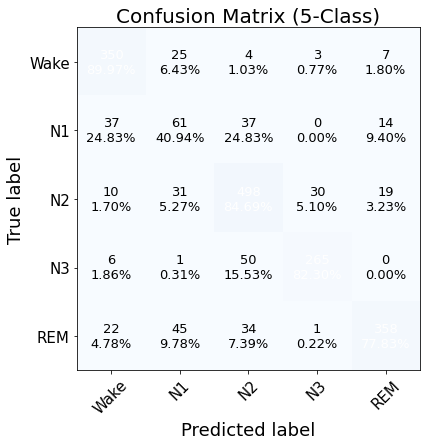

Accuracy 0.8029350104821803
Kappa 0.7442550718851264
Macro F1 Score 0.752279645204544
G Mean 0.8478154799859162
Sensitivity 0.7565811276435852
Specificity 0.9500515699386597
Class wise F1 Score [0.859950840473175, 0.3910256326198578, 0.8224607706069946, 0.8534621596336365, 0.8344988226890564]
Class wise Sensitivity Score [0.859950840473175, 0.3910256326198578, 0.8224607706069946, 0.8534621596336365, 0.8344988226890564]
Class wise Specificity Score [0.9737019538879395, 0.9495701789855957, 0.929961085319519, 0.9645742774009705, 0.9324503540992737]


In [ ]:
#5 Class
sens_l,spec_l,f1_l,prec_l, sens,spec,f1,prec = confusion_matrix(torch.from_numpy(main_all_pred), torch.from_numpy(main_all_labels),
                                                5, labels_val_main.shape[0], print_conf_mat=True)

g = g_mean(sens, spec)

acc = accuracy(torch.from_numpy(main_all_pred), torch.from_numpy(main_all_labels))

kap = kappa(torch.from_numpy(main_all_pred), torch.from_numpy(main_all_labels))

print(f"Accuracy {acc}")
print(f"Kappa {kap}")
print(f"Macro F1 Score {f1}")
print(f"G Mean {g}")
print(f"Sensitivity {sens}")
print(f"Specificity {spec}")
print(f"Class wise F1 Score {f1_l}")
print(f"Class wise Sensitivity Score {f1_l}")
print(f"Class wise Specificity Score {spec_l}")

In [ ]:
#3 Class
label_3 = []
pred_3 = [] 
for i in range (main_all_pred.shape[0]):
    predss = np.argmax(main_all_pred[i], 1)
    if predss:

sens_l,spec_l,f1_l,prec_l, sens,spec,f1,prec = confusion_matrix(torch.from_numpy(main_all_pred), torch.from_numpy(main_all_labels),
                                                5, labels_val_main.shape[0], print_conf_mat=True)

g = g_mean(sens, spec)

acc = accuracy(torch.from_numpy(main_all_pred), torch.from_numpy(main_all_labels))

kap = kappa(torch.from_numpy(main_all_pred), torch.from_numpy(main_all_labels))

print(f"Accuracy {acc}")
print(f"Kappa {kap}")
print(f"Macro F1 Score {f1}")
print(f"G Mean {g}")
print(f"Sensitivity {sens}")
print(f"Specificity {spec}")
print(f"Class wise F1 Score {f1_l}")
print(f"Class wise Sensitivity Score {f1_l}")
print(f"Class wise Specificity Score {spec_l}")

SyntaxError: invalid syntax (2835729725.py, line 6)

In [ ]:
# #for val Data
# test_features, test_labels = next(iter(val_data_loader))
# print(f"Feature batch shape: {test_features.size()}")
# print(f"Labels batch shape: {test_labels.size()}")
# sig = test_features[0].squeeze()
# print(sig.shape)
# label = test_labels[0]
# plt.figure(figsize = (20,5))
# plt.plot(sig)
# plt.title(f"Sleep Stage EEG for Class :{label}")
# plt.show()
# print(f"Label: {label}")
# print(f"Minimum :{sig.min()}")
# print(f"Maximum :{sig.max()}")
# print(f"Mean :{torch.mean(sig)}")
# print(f"Standard Deviation :{torch.std(sig)}")

In [ ]:
# d_num = 0
# input = torch.reshape(test_features,(batch_size,1,3000)).to(device)
# sig = test_features[d_num].squeeze()
# print(input.shape)


# pred,enc1,atten_feat = test_model(input.float())

# atten = atten_feat[d_num].squeeze()
# enc1 = enc1[d_num].squeeze()

# # atten = torch.softmax(atten, dim=-1)
# # enc1 =  torch.softmax(enc1, dim=-1)
# print(atten.shape, enc1.shape)

# atten = torch.sum(atten, dim = 0)
# enc1 = torch.sum(enc1, dim = 0)
# print(atten.shape, enc1.shape)

# atten = atten.detach().cpu().numpy()
# enc1 = enc1.detach().cpu().numpy()
# # print(atten)

# atten_new = np.zeros((3000,))
# enc1_new = np.zeros((3000,))
# for i in range(len(atten)):
#   atten_new[i*25:i*25+25] = atten[i]
#   enc1_new[i*25:i*25+25] = enc1[i]
# print(atten_new.shape, enc1_new.shape)
# atten_new = atten_new / atten.max()
# enc1_new = enc1_new / atten.max()

# plt.figure(figsize = (20,10))
# plt.plot(sig, label = "sig")
# plt.plot(atten_new+2, label = "Attention layer output")
# plt.plot(enc1_new*10-2, label = "Encoder output")
# plt.axhline(2, color='black')
# plt.axhline(0, color='black')
# plt.axhline(-2, color='black')
# plt.legend()
# plt.title(f"Sleep Stage EEG for Class :{label}  (before softmax)")
# plt.show()

In [ ]:
# #With softmax
# d_num = 0
# input = torch.reshape(test_features,(batch_size,1,3000)).to(device)
# sig = test_features[d_num].squeeze()
# print(input.shape)


# pred,enc1,atten_feat = test_model(input.float())
# pred = pred[d_num].squeeze()
# pred =  torch.softmax(pred, dim=-1)
# pred = torch.argmax(pred)
# print(f"Prediction :{pred}")
# atten = atten_feat[d_num].squeeze()
# enc1 = enc1[d_num].squeeze()

# atten = torch.softmax(atten, dim=-1)
# enc1 =  torch.softmax(enc1, dim=-1)
# print(atten.shape, enc1.shape)

# atten = torch.sum(atten, dim = 0)
# enc1 = torch.sum(enc1, dim = 0)
# print(atten.shape, enc1.shape)

# atten = atten.detach().cpu().numpy()
# enc1 = enc1.detach().cpu().numpy()
# # print(atten)

# atten_new = np.zeros((3000,))
# enc1_new = np.zeros((3000,))
# for i in range(len(atten)):
#   atten_new[i*25:i*25+25] = atten[i]
#   enc1_new[i*25:i*25+25] = enc1[i]
# print(atten_new.shape, enc1_new.shape)
# atten_new = atten_new / atten.max()
# enc1_new = enc1_new / atten.max()

# plt.figure(figsize = (20,10))
# plt.plot(sig, label = "sig")
# plt.plot(atten_new*2+2, label = "Attention layer output")
# plt.plot(enc1_new*10-3, label = "Encoder output")
# plt.axhline(2, color='black')
# plt.axhline(0, color='black')
# plt.axhline(-2, color='black')
# plt.legend()
# plt.title(f"Sleep Stage EEG for Class :{label} (with softmax)")
# plt.show()

In [ ]:
# class EarEEG_MultiChan_Dataset(Dataset):
#     def __init__(self, psg_file, label_file, device, mean_l = None, sd_l = None,
#                 accept_L = None,accept_R = None, transform=None, target_transform=None, sub_wise_norm = False):
#         """
      
#         """
#         # Get the data
#         for i in range(len(psg_file)):
#           if i == 0:
#             if accept_L.all():
#               psg_signal = read_h5py(psg_file[i])
#               ear_eeg_L = psg_signal[accept_L[i]]
#               ear_eeg_R = psg_signal[accept_R[i]]
#               ear_eeg_avg = np.mean(ear_eeg_L,0)-np.mean(ear_eeg_R,0)
#               ear_eeg_avg = np.reshape(ear_eeg_avg,(ear_eeg_avg.shape[0],1,ear_eeg_avg.shape[1]))
#               eog =  np.reshape(psg_signal[16] - psg_signal[4],(ear_eeg_avg.shape[0],1,ear_eeg_avg.shape[-1]))
#               emg = np.reshape(psg_signal[22],(ear_eeg_avg.shape[0],1,ear_eeg_avg.shape[-1]))
#               self.psg = np.concatenate((ear_eeg_avg,eog,emg),axis = 1) 
#               self.labels = read_h5py(label_file[i])
#             else:  
#               self.psg = read_h5py(psg_file[i])
#               self.labels = read_h5py(label_file[i])
#           else:
#             if accept_L.all():
#               psg_signal = read_h5py(psg_file[i])
#               ear_eeg_L = psg_signal[accept_L[i]]
#               ear_eeg_R = psg_signal[accept_R[i]]
#               ear_eeg_avg = np.mean(ear_eeg_L,0)-np.mean(ear_eeg_R,0)
#               ear_eeg_avg = np.reshape(ear_eeg_avg,(ear_eeg_avg.shape[0],1,ear_eeg_avg.shape[1]))
#               eog =  np.reshape(psg_signal[16] - psg_signal[4],(ear_eeg_avg.shape[0],1,ear_eeg_avg.shape[-1]))
#               emg = np.reshape(psg_signal[22],(ear_eeg_avg.shape[0],1,ear_eeg_avg.shape[-1]))
#               psg_comb = np.concatenate((ear_eeg_avg,eog,emg),axis = 1) 
#               self.psg = np.concatenate((self.psg,psg_comb),axis = 0)
#               self.labels = np.concatenate((self.labels, read_h5py(label_file[i])),axis = 0)

#             else:
#               self.psg = np.concatenate((self.psg, read_h5py(psg_file[i])),axis = 1)
#               self.labels = np.concatenate((self.labels, read_h5py(label_file[i])),axis = 0)

#         self.labels = torch.from_numpy(self.labels)
#         print(f"Data shape : {self.psg.shape}")
#         print(f"Labels shape : {self.labels.shape}")

#         if sub_wise_norm == True:
#           print(f"Reading Subject wise mean and sd")
#           for i in range(len(mean_l)):
#             if i == 0:
#               self.mean_l  = read_h5py(mean_l[i])
#               self.sd_l = read_h5py(sd_l[i])
#             else:
#               self.mean_l = np.concatenate((self.mean_l, read_h5py(mean_l[i])),axis = 1)
#               self.sd_l = np.concatenate((self.sd_l, read_h5py(sd_l[i])),axis = 1)

#           print(f"Shapes of Mean  : {self.mean_l.shape}")
#           print(f"Shapes of Sd    : {self.sd_l.shape}")
#         else:     
#           self.mean = mean_l
#           self.sd = sd_l
#           print(f"Mean : {self.mean} and SD {self.sd}")  

#         self.sub_wise_norm = sub_wise_norm
#         self.device = device
#         self.transform = transform
#         self.target_transform = target_transform

#     def __len__(self):
#         return len(self.labels)

#     def __getitem__(self, idx):
#         psg_data = self.psg[idx]         
#         # print(data.shape)
#         label = self.labels[idx,]
        
#         if self.sub_wise_norm ==True:
#           psg_data = (psg_data - self.mean_l[idx]) / self.sd_l[idx]
#         elif self.mean and self.sd:
#           psg_data = (psg_data - self.mean_l) / self.sd_l

#         if self.transform:
#             psg_data = self.transform(psg_data)
#         if self.target_transform:
#             label = self.target_transform(label)
#         return psg_data, label

In [ ]:
# left_ear = [0,1,2,7,8,9]
# right_ear = [3,4,5,6,10,11]
# map = [5,6,7,8,9,10,11,17,18,19,20,21]
# accept_left_ear = []
# accept_right_ear = []

# for i in range(len(rejection_list)):
#     l_temp = []
#     r_temp = []
#     for j in range(len(rejection_list[i])):
#         if j in left_ear and rejection_list[i][j] == True:
#             l_temp.append(map[j])
#         if j in right_ear and rejection_list[i][j] == True:
#             r_temp.append(map[j])
    
#     accept_left_ear.append(l_temp)
#     accept_right_ear.append(r_temp)

# print(accept_left_ear)
# print(accept_right_ear)

# [train_L_acc_list, val_L_acc_list] = split_data(accept_left_ear,train_data_list,val_data_list)
# print(train_L_acc_list)
# print(val_L_acc_list)

# [train_R_acc_list, val_R_acc_list] = split_data(accept_right_ear,train_data_list,val_data_list)
# print(train_R_acc_list)
# print(val_R_acc_list)

In [ ]:
# class Transformer_Enc_Layer(Module):
#     r"""
#     Args:
#         d_model: the number of expected features in the input (required).
#         nhead: the number of heads in the multiheadattention models (required).
#         dim_feedforward: the dimension of the feedforward network model (default=2048).
#         dropout: the dropout value (default=0.1).
#         activation: the activation function of intermediate layer, relu or gelu (default=relu).
#         layer_norm_eps: the eps value in layer normalization components (default=1e-5).
#         batch_first: If ``True``, then the input and output tensors are provided
#             as (batch, seq, feature). Default: ``False``.

#     Examples::
#         >>> encoder_layer = nn.TransformerEncoderLayer(d_model=512, nhead=8)
#         >>> src = torch.rand(10, 32, 512)
#         >>> out = encoder_layer(src)

#     Alternatively, when ``batch_first`` is ``True``:
#         >>> encoder_layer = nn.TransformerEncoderLayer(d_model=512, nhead=8, batch_first=True)
#         >>> src = torch.rand(32, 10, 512)
#         >>> out = encoder_layer(src)
#     """
#     __constants__ = ['batch_first']

#     def __init__(self, d_model, nhead, dim_feedforward=2048, dropout=0.1, activation="relu",
#                  layer_norm_eps=1e-5, batch_first=False,
#                  device=None, dtype=None) -> None:
#         factory_kwargs = {'device': device, 'dtype': dtype}
#         super(Transformer_Enc_Layer, self).__init__()
#         self.self_attn = MultiheadAttention(d_model, nhead, dropout=dropout, batch_first=batch_first,
#                                             **factory_kwargs)
#         # Implementation of Feedforward model
#         self.linear1 = Linear(d_model, dim_feedforward, **factory_kwargs)
#         self.dropout = Dropout(dropout)
#         self.linear2 = Linear(dim_feedforward, d_model, **factory_kwargs)

#         self.norm1 = LayerNorm(d_model, eps=layer_norm_eps, **factory_kwargs)
#         self.norm2 = LayerNorm(d_model, eps=layer_norm_eps, **factory_kwargs)
#         self.dropout1 = Dropout(dropout)
#         self.dropout2 = Dropout(dropout)

#         self.activation = _get_activation_fn(activation)

#     def __setstate__(self, state):
#         if 'activation' not in state:
#             state['activation'] = F.relu
#         super(Transformer_Enc_Layer, self).__setstate__(state)

#     def forward(self, src: Tensor, src_mask: Optional[Tensor] = None, src_key_padding_mask: Optional[Tensor] = None) -> Tensor:
#         r"""Pass the input through the encoder layer.

#         Args:
#             src: the sequence to the encoder layer (required).
#             src_mask: the mask for the src sequence (optional).
#             src_key_padding_mask: the mask for the src keys per batch (optional).

#         Shape:
#             see the docs in Transformer class.
#         """
#         src2 = self.self_attn(src, src, src, attn_mask=src_mask,
#                               key_padding_mask=src_key_padding_mask)[0]
#         atten_feat = src2
#         src = src + self.dropout1(src2)
#         src = self.norm1(src)
#         src2 = self.linear2(self.dropout(self.activation(self.linear1(src))))
#         src = src + self.dropout2(src2)
#         src = self.norm2(src)
#         return src, atten_feat



In [ ]:
# class Cross_Transformer_Enc_Layer(Module):
#     r"""
#     Args:
#         d_model: the number of expected features in the input (required).
#         nhead: the number of heads in the multiheadattention models (required).
#         dim_feedforward: the dimension of the feedforward network model (default=2048).
#         dropout: the dropout value (default=0.1).
#         activation: the activation function of intermediate layer, relu or gelu (default=relu).
#         layer_norm_eps: the eps value in layer normalization components (default=1e-5).
#         batch_first: If ``True``, then the input and output tensors are provided
#             as (batch, seq, feature). Default: ``False``.

#     Examples::
#         >>> encoder_layer = nn.TransformerEncoderLayer(d_model=512, nhead=8)
#         >>> src = torch.rand(10, 32, 512)
#         >>> out = encoder_layer(src)

#     Alternatively, when ``batch_first`` is ``True``:
#         >>> encoder_layer = nn.TransformerEncoderLayer(d_model=512, nhead=8, batch_first=True)
#         >>> src = torch.rand(32, 10, 512)
#         >>> out = encoder_layer(src)
#     """
#     __constants__ = ['batch_first']

#     def __init__(self, d_model, nhead, dim_feedforward=512,seq_length = 30, dropout=0.1, activation="relu",
#                  layer_norm_eps=1e-5, batch_first=False,
#                  device=None, dtype=None) -> None:
#         factory_kwargs = {'device': device, 'dtype': dtype}
#         super(Cross_Transformer_Enc_Layer, self).__init__()
#           ###### Attention and cross attention block
#         self.self_attn_eeg = MultiheadAttention(d_model, nhead, dropout=dropout, batch_first=batch_first,
#                                             **factory_kwargs)
#         self.linear_eeg = Linear(d_model,1)

#         self.self_attn_eog = MultiheadAttention(d_model, nhead, dropout=dropout, batch_first=batch_first,
#                                             **factory_kwargs)
#         self.linear_eog = Linear(d_model,1)

#         self.self_attn_2eeg = MultiheadAttention(d_model, nhead, dropout=dropout, batch_first=batch_first,
#                                            **factory_kwargs)
#         self.linear_2eeg = Linear(d_model,1)
#         ############################# Cross#######################################
#         self.self_attn_cross = MultiheadAttention(seq_length, 10, dropout=dropout, batch_first=batch_first,
#                                            **factory_kwargs)
#         self.linear_eeg2 = Linear(1,d_model)
#         self.dropout_eeg = Dropout(dropout)
#         self.norm_eeg = LayerNorm(d_model, eps=layer_norm_eps, **factory_kwargs)

#         self.linear_eog2 = Linear(1,d_model)
#         self.dropout_eog = Dropout(dropout)
#         self.norm_eog = LayerNorm(d_model, eps=layer_norm_eps, **factory_kwargs)

#         self.linear_2eeg2 = Linear(1,d_model)
#         self.dropout_2eeg = Dropout(dropout)
#         self.norm_2eeg = LayerNorm(d_model, eps=layer_norm_eps, **factory_kwargs)
#         # Implementation of Feedforward model

#         self.linear_eeg_ff1 = Linear(d_model, dim_feedforward, **factory_kwargs)
#         self.dropout_eeg_ff = Dropout(dropout)
#         self.linear_eeg_ff2 = Linear(dim_feedforward, d_model, **factory_kwargs)
#         self.dropout_eeg_ff2 = Dropout(dropout)
#         self.norm_eeg_ff = LayerNorm(d_model, eps=layer_norm_eps, **factory_kwargs)


#         self.linear_eog_ff1 = Linear(d_model, dim_feedforward, **factory_kwargs)
#         self.dropout_eog_ff = Dropout(dropout)
#         self.linear_eog_ff2 = Linear(dim_feedforward, d_model, **factory_kwargs)
#         self.dropout_eog_ff2= Dropout(dropout)
#         self.norm_eog_ff = LayerNorm(d_model, eps=layer_norm_eps, **factory_kwargs)

#         self.linear_2eeg_ff1 = Linear(d_model, dim_feedforward, **factory_kwargs)
#         self.dropout_2eeg_ff = Dropout(dropout)
#         self.linear_2eeg_ff2 = Linear(dim_feedforward, d_model, **factory_kwargs)
#         self.dropout_2eeg_ff2 = Dropout(dropout)
#         self.norm_2eeg_ff = LayerNorm(d_model, eps=layer_norm_eps, **factory_kwargs)
        
#         self.activation = _get_activation_fn(activation)

#     def __setstate__(self, state):
#         if 'activation' not in state:
#             state['activation'] = F.relu
#         super(Cross_Transformer_Enc_Layer, self).__setstate__(state)

#     def forward(self, src_eeg: Tensor,src_eog: Tensor,src_2eeg: Tensor, src_mask: Optional[Tensor] = None, src_key_padding_mask: Optional[Tensor] = None) -> Tensor:
#         r"""Pass the input through the encoder layer.

#         Args:
#             src: the sequence to the encoder layer (required).
#             src_mask: the mask for the src sequence (optional).
#             src_key_padding_mask: the mask for the src keys per batch (optional).

#         Shape:
#             see the docs in Transformer class.
#         """
#         ## Self Attention
#         src_eeg_2 = self.self_attn_eeg(src_eeg, src_eeg, src_eeg, attn_mask=src_mask,
#                               key_padding_mask=src_key_padding_mask)[0]
#         # print(f"EEG befor self attention linear: {src_eeg_2.shape}")
#         src_eeg_2 = self.linear_eeg(src_eeg_2)
#         # print(f"EEG after self attention: {src_eeg_2.shape}")

#         src_eog_2 = self.self_attn_eog(src_eog, src_eog, src_eog, attn_mask=src_mask,
#                               key_padding_mask=src_key_padding_mask)[0]
#         src_eog_2 = self.linear_eog(src_eog_2)
#         # print(f"EOG after self attention: {src_eog_2.shape}")
        
#         src_2eeg_2 = self.self_attn_2eeg(src_2eeg, src_2eeg, src_2eeg, attn_mask=src_mask,
#                               key_padding_mask=src_key_padding_mask)[0]
#         src_2eeg_2 = self.linear_2eeg(src_2eeg_2)
#         # print(f"EMG after self attention: {src_emg_2.shape}")

#         ## Cross Attention
#         cross_in = torch.cat((src_eeg_2,src_eog_2,src_2eeg_2), dim = 2)
#         cross_in = torch.moveaxis(cross_in,-1,1)
#         # print(f"Cross Input Shape: {cross_in.shape}")
#         cross_out = self.self_attn_cross(cross_in, cross_in, cross_in, attn_mask=src_mask,
#                               key_padding_mask=src_key_padding_mask)[0]
#         # print(f"Cross Output Shape: {cross_out.shape}")

#         eeg_2 = self.linear_eeg2(cross_out[:,0,:].view(cross_out.shape[0],cross_out.shape[2],1))
#         eeg_2 = src_eeg + self.dropout_eeg(eeg_2)
#         eeg_2 = self.norm_eeg(eeg_2)
#         # print(f"EEG after cross attention and linear: {eeg_2.shape}")

#         eog_2 = self.linear_eog2(cross_out[:,1,:].view(cross_out.shape[0],cross_out.shape[2],1))
#         eog_2 = src_eog + self.dropout_eog(eog_2)
#         eog_2 = self.norm_eog(eog_2)

#         eeg2_2 = self.linear_2eeg2(cross_out[:,2,:].view(cross_out.shape[0],cross_out.shape[2],1))
#         eeg2_2 = src_2eeg + self.dropout_2eeg(eeg2_2)
#         eeg2_2 = self.norm_2eeg(eeg2_2)

#         #### Feed forward
#         eeg3 = self.linear_eeg_ff2(self.dropout_eeg_ff(self.activation(self.linear_eeg_ff1(eeg_2))))
#         eeg3 = eeg_2 + self.dropout_eeg_ff2(eeg3)
#         eeg3 = self.norm_eeg_ff(eeg3)
#         ## print(f"EEG after ff: {eeg3.shape}")

#         eog3 = self.linear_eog_ff2(self.dropout_eog_ff(self.activation(self.linear_eog_ff1(eog_2))))
#         eog3 = eog_2 + self.dropout_eog_ff2(eog3)
#         eog3 = self.norm_eog_ff(eog3)

#         eeg2_3 = self.linear_2eeg_ff2(self.dropout_2eeg_ff(self.activation(self.linear_2eeg_ff1(eeg2_2))))
#         eeg2_3 = eeg2_2 + self.dropout_2eeg_ff2(eeg2_3)
#         eeg2_3 = self.norm_2eeg_ff(eeg2_3)


#         return eeg3,eog3,eeg2_3



In [ ]:
## Original
# def EEG_process(data,rejected_list,i=0):
#     _,_,_,_,_,ELA,ELE,ELI,ERA,ERG,ERE,ERI,_,_,_,_,_,ELB,ELG,ELK,ERB,ERK,_ = data
#     reject = rejected_list[i]
#     ear_eeg = [ELA,ELE,ELI,ERA,ERG,ERE,ERI,ELB,ELG,ELK,ERB,ERK]
    
#     for j in range (len(reject)):
#         ear_eeg[j]=ear_eeg[j]*reject[j]
    

#     Left_ear = (ear_eeg[0] + ear_eeg[1] + ear_eeg[2] + ear_eeg[7] + ear_eeg[8] + ear_eeg[9])/np.count_nonzero([reject[0],reject[1],reject[2],reject[7],reject[8],reject[9]])   # (ELA + ELE + ELI + ELB + ELG + ELK)/6
#     Right_ear = (ear_eeg[3] + ear_eeg[4] + ear_eeg[5] + ear_eeg[6] + ear_eeg[10] + ear_eeg[11])/np.count_nonzero([reject[3],reject[4],reject[5],reject[6],reject[10],reject[11]]) # (ERA + ERG + ERE + ERI + ERB + ERK)/6
#     L_R = Left_ear - Right_ear

#     if np.count_nonzero([reject[0],reject[7]]) != 0 :
#         L_E = (ear_eeg[0]+ear_eeg[7])/np.count_nonzero([reject[0],reject[7]]) - (ear_eeg[1]+ear_eeg[2]+ear_eeg[8]+ear_eeg[9])/np.count_nonzero([reject[1],reject[2],reject[8],reject[9]]) #(ELA + ELB)/2 - (ELE + ELI + ELG + ELK)/4
#     else:
#         L_E = np.zeros(data.shape[1])
#     if np.count_nonzero([reject[3],reject[10]]) != 0 :
#         R_E = (ear_eeg[3]+ear_eeg[10])/np.count_nonzero([reject[3],reject[10]]) - (ear_eeg[4]+ear_eeg[5]+ear_eeg[6]+ear_eeg[11])/np.count_nonzero([reject[4],reject[5],reject[6],reject[11]]) # (ERA + ERB)/2 - (ERE + ERI + ERG + ERK)/4
#     else:
#         R_E = np.zeros(data.shape[1])

#     return L_R, L_E, R_E

# class EarEEG_MultiChan_Dataset(Dataset):
#     def __init__(self, psg_file, label_file, device, mean_l = None, sd_l = None,
#                 reject_list = None, transform=None, target_transform=None, sub_wise_norm = False):
#         """
      
#         """
#         # Get the data
#         for i in range(len(psg_file)):
#           if i == 0:
#             if reject_list.any():
#               psg_signal = read_h5py(psg_file[i])
#               L_R, L_E, R_E = EEG_process(psg_signal,reject_list,i=i)
#               # print(L_R.shape,L_E.shape,R_E.shape)
#               # break
#               L_R = np.reshape(L_R,(L_R.shape[0],1,L_R.shape[1]))
#               L_E = np.reshape(L_E,(L_E.shape[0],1,L_E.shape[1]))
#               R_E = np.reshape(R_E,(R_E.shape[0],1,R_E.shape[1]))

#               # L_R = (L_R - np.mean(L_R))/np.std(L_R)
#               # L_E = (L_E - np.mean(L_E))/np.std(L_E)
#               # R_E = (R_E - np.mean(R_E))/np.std(R_E)
#               eog =  np.reshape(psg_signal[16] - psg_signal[4],(L_R.shape[0],1,L_R.shape[-1]))
#               emg = np.reshape(psg_signal[22],(L_R.shape[0],1,L_R.shape[-1]))
#               # self.psg = np.concatenate((L_R,eog,emg),axis = 1) 
#               self.psg = np.concatenate((L_R,L_E,R_E),axis = 1) 
#               # self.psg = np.concatenate((L_E,R_E,eog),axis = 1) 
#               self.labels = read_h5py(label_file[i])
#             else:  
#               self.psg = read_h5py(psg_file[i])
#               self.labels = read_h5py(label_file[i])
#           else:
#             if reject_list.any():
#               psg_signal = read_h5py(psg_file[i])
#               L_R, L_E, R_E = EEG_process(psg_signal,reject_list,i=i)
#               L_R = np.reshape(L_R,(L_R.shape[0],1,L_R.shape[1]))
#               L_E = np.reshape(L_E,(L_E.shape[0],1,L_E.shape[1]))
#               R_E = np.reshape(R_E,(R_E.shape[0],1,R_E.shape[1]))

#               # L_R = (L_R - np.mean(L_R))/np.std(L_R)
#               # L_E = (L_E - np.mean(L_E))/np.std(L_E)
#               # R_E = (R_E - np.mean(R_E))/np.std(R_E)
#               eog =  np.reshape(psg_signal[16] - psg_signal[4],(L_R.shape[0],1,L_R.shape[-1]))
#               emg = np.reshape(psg_signal[22],(L_R.shape[0],1,L_R.shape[-1]))
#               # psg_comb = np.concatenate((L_R,eog,emg),axis = 1) 
#               psg_comb = np.concatenate((L_R,L_E,R_E),axis = 1) 
#               self.psg = np.concatenate((self.psg,psg_comb),axis = 0)
#               self.labels = np.concatenate((self.labels, read_h5py(label_file[i])),axis = 0)

#             else:
#               self.psg = np.concatenate((self.psg, read_h5py(psg_file[i])),axis = 1)
#               self.labels = np.concatenate((self.labels, read_h5py(label_file[i])),axis = 0)

#         self.labels = torch.from_numpy(self.labels)
#         print(f"Data shape : {self.psg.shape}")
#         print(f"Labels shape : {self.labels.shape}")
#         bin_labels = np.bincount(self.labels)
#         print(f"Labels count: {bin_labels/self.labels.shape[0]}")
#         print(f"Labels count weights: {1/(bin_labels/self.labels.shape[0])}")
        
#         if sub_wise_norm == True:
#           print(f"Reading Subject wise mean and sd")
#           for i in range(len(mean_l)):
#             if i == 0:
#               self.mean_l  = read_h5py(mean_l[i])
#               self.sd_l = read_h5py(sd_l[i])
#             else:
#               self.mean_l = np.concatenate((self.mean_l, read_h5py(mean_l[i])),axis = 1)
#               self.sd_l = np.concatenate((self.sd_l, read_h5py(sd_l[i])),axis = 1)

#           print(f"Shapes of Mean  : {self.mean_l.shape}")
#           print(f"Shapes of Sd    : {self.sd_l.shape}")
#         else:     
#           self.mean = mean_l
#           self.sd = sd_l
#           print(f"Mean : {self.mean} and SD {self.sd}")  

#         self.sub_wise_norm = sub_wise_norm
#         self.device = device
#         self.transform = transform
#         self.target_transform = target_transform

#     def __len__(self):
#         return len(self.labels)

#     def __getitem__(self, idx):
#         psg_data = self.psg[idx]         
#         # print(data.shape)
#         label = self.labels[idx,]
        
#         if self.sub_wise_norm ==True:
#           psg_data = (psg_data - self.mean_l[idx]) / self.sd_l[idx]
#         elif self.mean and self.sd:
#           psg_data = (psg_data - self.mean_l) / self.sd_l

#         if self.transform:
#             psg_data = self.transform(psg_data)
#         if self.target_transform:
#             label = self.target_transform(label)
#         return psg_data, label
# train_dataset = EarEEG_MultiChan_Dataset(psg_file = train_psg_list, 
#                                        label_file = train_label_list, device = device, 
#                                     #    mean_l = val_mean_list, sd_l = val_sd_list,
#                                        reject_list = train_reject_list,
#                                        sub_wise_norm = False,
#                                        transform=transforms.Compose([
#                                         transforms.ToTensor(),
#                                         # #  transforms.Normalize(
#                                         #     (0.5,), (0.5,))
#                                         ]) )
# val_dataset = EarEEG_MultiChan_Dataset(psg_file = val_psg_list, 
#                                        label_file = val_label_list, device = device, 
#                                     #    mean_l = val_mean_list, sd_l = val_sd_list,
#                                        reject_list = val_reject_list,
#                                        sub_wise_norm = False,
#                                        transform=transforms.Compose([
#                                         transforms.ToTensor(),
#                                         # #  transforms.Normalize(
#                                         #     (0.5,), (0.5,))
#                                         ]) )

In [ ]:
# def plot_confusion_matrix(cm,
#                           target_names,
#                           title='Confusion matrix',
#                           cmap=None,
#                           normalize=True):

#     import matplotlib.pyplot as plt
#     import numpy as np
#     import itertools

#     accuracy = np.trace(cm) / float(np.sum(cm))
#     misclass = 1 - accuracy

#     if cmap is None:
#         cmap = plt.get_cmap('Blues')

#     plt.figure(figsize=(8, 6))
#     plt.imshow(cm, interpolation='nearest', cmap=cmap,vmin =100 ,vmax = 15000)
#     plt.title(title,fontsize = 20)
#     # plt.colorbar()

#     if target_names is not None:
#         tick_marks = np.arange(len(target_names))
#         plt.xticks(tick_marks, target_names, rotation=45, fontsize = 15)
#         plt.yticks(tick_marks, target_names,fontsize = 15)

#     if normalize:
#         cm2 = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


#     thresh = cm.max() / 3 if normalize else cm.max() / 2
#     for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
#         if normalize:
#             plt.text(j, i, "{:,}\n{:0.2f}%".format(int(cm[i, j]),cm2[i, j]*100),
#                      horizontalalignment="center", verticalalignment="center",
#                      color="white" if cm[i, j] > thresh else "black", fontsize = 13)
#         else:
#             plt.text(j, i, "{:,}".format(cm[i, j]),
#                      horizontalalignment="center",
#                      color="white" if cm[i, j] > thresh else "black")


#     plt.tight_layout()
#     plt.ylabel('True label',fontsize = 18)
#     plt.xlabel('Predicted label',fontsize = 18)#\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
#     plt.show()

In [ ]:
# import torch.optim as optim

# lr = 0.001
# beta_1 =  0.9    
# beta_2 =  0.999
# eps = 1e-9
# n_epochs = 50
# weights = torch.tensor([1., 4., 2., 3., 3.])#[1.,2.,1.,2.,2.])#[1., 4., 2., 3., 3.])  #valset 1: ([1, 3., 1., 5.5., 2.5])                     #([1., 2., 1., 2., 2.])
# print(f"weights: {weights}")
# criterion = nn.CrossEntropyLoss(weight=weights)  #### Check the Criterion Jathu
# optimizer = torch.optim.Adam(Net_s.parameters(), lr=lr, betas=(beta_1, beta_2),eps = eps, weight_decay = 0.0001)


# pred = Net_t(psg_data[:,:,0,:].float().to(device), psg_data[:,:,1,:].float().to(device), psg_data[:,:,2,:].float().to(device))#train_features_2.float())  #,enc1,atten_feat
# print(pred.shape)
# # print(torch.argmax(pred, 1))
# pred = Net_s(psg_data[:,:,0,:].float().to(device), psg_data[:,:,1,:].float().to(device), psg_data[:,:,2,:].float().to(device))#train_features_2.float())  #,enc1,atten_feat
# print(pred.shape)
# # this is for Neptune
# parameters = {
#     "Subject " : "9" ,
#     "Experiment done by" : "Mithunjha",
#     "Experiment" : "Knowledge distillation - teacher & STUDENT pretrained" ,
#     'Model Type' : "scalp (C3-O1,C4-O2,EOG) and ear EEG (L,R,EOG)",
#     'filt_ch' : 64,
#     'Batch Size': batch_size,
#     'Loss': f"Weighted Categorical Loss {weights}", 
#     'Optimizer' : "Adam",        
#     'Learning Rate': lr,
#     'eps' : eps,
#     'n_epochs': n_epochs,
#     'val_subject' : val_data_list[0]+1 
# }
# run['model/parameters'] = parameters
# run['model/model_architecture'] = Net_s

### Classification Model Cross Transformer

In [ ]:
import copy
from typing import Optional, Any

import torch
from torch import Tensor
from torch.nn import functional as F
from torch.nn import Module
from torch.nn import MultiheadAttention
from torch.nn import ModuleList
from torch.nn.init import xavier_uniform_
from torch.nn import Dropout
from torch.nn import Linear
from torch.nn import LayerNorm

In [ ]:
def _get_clones(module, N):
    return ModuleList([copy.deepcopy(module) for i in range(N)])


def _get_activation_fn(activation):
    if activation == "relu":
        return F.relu
    elif activation == "gelu":
        return F.gelu

    raise RuntimeError("activation should be relu/gelu, not {}".format(activation))

class PositionalEncoding(nn.Module):

    def __init__(self, d_model: int, dropout: float = 0.1, max_len: int = 5000):
        super().__init__()
        self.dropout = nn.Dropout(p=dropout)

        position = torch.arange(max_len).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2) * (-math.log(10000.0) / d_model))
        pe = torch.zeros(max_len, 1, d_model)
        pe[:, 0, 0::2] = torch.sin(position * div_term)
        pe[:, 0, 1::2] = torch.cos(position * div_term)
        self.register_buffer('pe', pe)

    def forward(self, x: Tensor) -> Tensor:
        """
        Args:
            x: Tensor, shape [seq_len, batch_size, embedding_dim]
        """
        x = x + self.pe[:x.size(0)]
        return self.dropout(x)

In [ ]:
#input ==> 32, 1, 1, 3000,, b==> batch, e==> embedding, s==> seq length
class Window_Embedding(nn.Module): 
    def __init__(self, in_channels: int = 1, window_size: int = 50, emb_size: int = 64):
        super(Window_Embedding, self).__init__()

        self.projection_1 =  nn.Sequential(
            # using a conv layer instead of a linear one -> performance gains, in=>B,1,3000 out=>B,64,60
            nn.Conv1d(in_channels, emb_size//4, kernel_size = window_size, stride = window_size),
            nn.LeakyReLU(),
            nn.BatchNorm1d(emb_size//4),
            # Rearrange('b e s -> b s e'),
            )
        self.projection_2 =  nn.Sequential(#################
            # using a conv layer instead of a linear one -> performance gains, in=>B,1,3000 out=>B,64,60
            nn.Conv1d(in_channels, emb_size//8, kernel_size = 5, stride = 5),
            nn.LeakyReLU(),
            nn.Conv1d(emb_size//8, emb_size//4, kernel_size = 5, stride = 5),
            nn.LeakyReLU(),
            nn.Conv1d(emb_size//4, (emb_size-emb_size//4)//2, kernel_size = 2, stride = 2),
            nn.LeakyReLU(),
            nn.BatchNorm1d((emb_size-emb_size//4)//2),
            # Rearrange('b e s -> b s e'),
            )
        
        self.projection_3 =  nn.Sequential(#################
            # using a conv layer instead of a linear one -> performance gains, in=>B,1,3000 out=>B,64,60
            nn.Conv1d(in_channels, emb_size//4, kernel_size = 25, stride = 25),
            nn.LeakyReLU(),
            nn.Conv1d(emb_size//4, (emb_size-emb_size//4)//2, kernel_size =2, stride = 2),
            nn.LeakyReLU(),
            nn.BatchNorm1d((emb_size-emb_size//4)//2),
            # Rearrange('b e s -> b s e'),
            )
        
        
        self.projection_4 = nn.Sequential(
            # using a conv layer instead of a linear one -> performance gains, in=>B,1,3000 out=>B,64,60
            nn.Conv1d(emb_size, emb_size, kernel_size = 1, stride = 1),
            nn.LeakyReLU(),
            nn.BatchNorm1d(emb_size),
            Rearrange('b e s -> b s e'),)
            
        #in=>B,64,60 out=>B,64,61
        self.cls_token = nn.Parameter(torch.randn(1,1, emb_size))
        self.arrange1 = Rearrange('b s e -> s b e')
        #in=>61,B,64 out=>61,B,64
        self.pos = PositionalEncoding(d_model=emb_size)
        #in=>61,B,64 out=>B,61,64
        self.arrange2 = Rearrange('s b e -> b s e ')

    def forward(self, x: Tensor) -> Tensor:
        x = x.squeeze().unsqueeze(dim = 1)
        # print(x.shape)
        b,_, _ = x.shape
        x_1 = self.projection_1(x)  ########################
        x_2 = self.projection_2(x) ###########
        x_3 = self.projection_3(x) 
        # print(x_local.shape,x_global.shape)
        x = torch.cat([x_1,x_2,x_3],dim = 1)##### 2)
        x = self.projection_4(x) 
        # print(x.shape)
        cls_tokens = repeat(self.cls_token, '() s e -> b s e', b=b)
        # print(cls_tokens.shape)
        # prepend the cls token to the input
        x = torch.cat([cls_tokens, x], dim=1)
        # print(x.shape)
        # add position embedding
        x = self.arrange1(x)
        # print(x.shape)
        x = self.pos(x)
        # print(x.shape)
        x = self.arrange2(x)
        # print(x.shape)
        return x

In [ ]:
#input ==>(b,s,e)=>(32, 61, 64,) 
# b==> batch, s==> seq length, e==> embedding, 
class Intra_modal_atten(nn.Module): 
    def __init__(self, d_model=64, nhead=8, dropout=0.1,
                 layer_norm_eps=1e-5, window_size = 25, First = True,
                 device=None, dtype=None) -> None:
        super(Intra_modal_atten, self).__init__()
        factory_kwargs = {'device': device, 'dtype': dtype}
       
        if First == True:
            self.window_embed = Window_Embedding(in_channels = 1, window_size = window_size, emb_size = d_model)
        self.norm = LayerNorm(d_model, eps=layer_norm_eps, **factory_kwargs)  
        self.self_attn = MultiheadAttention(d_model, nhead, dropout=dropout, batch_first=True,
                                            **factory_kwargs)
        self.dropout = Dropout(dropout) 
        self.First = First

    def forward(self, x: Tensor) -> Tensor:
        if self.First == True:
            src = self.window_embed(x)
        else:
            src = x
        # print(src.shape)
        # src = self.norm(src)  #####
        # print(src.shape)
        src2 = self.self_attn(src, src, src)[0]
        # print(src2.shape)
        out = src + self.dropout(src2)
        out = self.norm(out)   ########
        return out                              

In [ ]:
##Cross Modal Attention
#input ==>(b,s,e)=>(32, 2, 64,) ==> Class tokens of EEG and EOG after intra modal attention
# b==> batch, s==> seq length, e==> embedding, 
class Cross_modal_atten(nn.Module): 
    def __init__(self, d_model=64, nhead=8, dropout=0.1,
                 layer_norm_eps=1e-5, First = False,
                 device=None, dtype=None) -> None:

        super(Cross_modal_atten, self).__init__()
        factory_kwargs = {'device': device, 'dtype': dtype}

        if First == True:
            self.cls_token = nn.Parameter(torch.randn(1,1, d_model)) ######
        self.norm = LayerNorm(d_model, eps=layer_norm_eps, **factory_kwargs)  
        self.cross_attn = MultiheadAttention(d_model, nhead, dropout=dropout, batch_first=True,
                                            **factory_kwargs)
        self.dropout = Dropout(dropout) 
        self.First = First

    def forward(self, x1: Tensor,x2: Tensor) -> Tensor:
        # print(x1.shape,x2.shape)
        if len(x1.shape) == 2:
            x = torch.cat([x1.unsqueeze(dim=1), x2.unsqueeze(dim=1)], dim=1)
        else:
            x = torch.cat([x1, x2.unsqueeze(dim=1)], dim=1)
        # print(x.shape)
        b,_, _ = x.shape
        if self.First == True:
            cls_tokens = repeat(self.cls_token, '() s e -> b s e', b=b)  ######
            # print(cls_tokens.shape)
            # prepend the cls token to the input
            src = torch.cat([cls_tokens, x], dim=1)  #####
        else:
            src = x
        # print(src.shape)
        # src = self.norm(src)#####(src)
        # print(src.shape)
        src2 = self.cross_attn(src, src, src)[0]
        # print(src2.shape)
        out = src + self.dropout(src2)
        out = self.norm(out)
        return out  

In [ ]:
##Feed Forward Networks
#input ==>(b,s,e)=>(32, 61, 64,) 
# b==> batch, s==> seq length, e==> embedding, 
class Feed_forward(nn.Module): 
    def __init__(self, d_model=64,dropout=0.1,dim_feedforward=512,
                 layer_norm_eps=1e-5,
                 device=None, dtype=None) -> None:

        super(Feed_forward, self).__init__()
        factory_kwargs = {'device': device, 'dtype': dtype}

        self.norm = LayerNorm(d_model, eps=layer_norm_eps, **factory_kwargs)
        self.linear1 = Linear(d_model, dim_feedforward, **factory_kwargs)
        self.relu = nn.ReLU()
        self.dropout1 = Dropout(dropout)
        self.linear2 = Linear(dim_feedforward, d_model, **factory_kwargs)
        self.dropout2 = Dropout(dropout)
        
    def forward(self, x: Tensor) -> Tensor:
        # print(x.shape)
        # src = self.norm(x)  ######
        src = x
        # print(src.shape)
        src2 = self.linear2(self.dropout1(self.relu(self.linear1(src))))
        # print(src2.shape)
        out = src + self.dropout2(src2)
        out = self.norm(out)
        return out

In [ ]:
# Best Model so far fine tuning
class Cross_Transformer_Network(nn.Module):
    def __init__(self,d_model = 64, dim_feedforward=512,window_size = 25): #  filt_ch = 4
        super(Cross_Transformer_Network, self).__init__()
        
        self.eeg_atten = Intra_modal_atten(d_model=d_model, nhead=8, dropout=0.1,
                                            window_size =window_size, First = True )
        self.eog_atten = Intra_modal_atten(d_model=d_model, nhead=8, dropout=0.1, 
                                            window_size =window_size, First = True )
        self.eeg2_atten = Intra_modal_atten(d_model=d_model, nhead=8, dropout=0.1, 
                                            window_size =window_size, First = True )
        
        self.cross_atten = Cross_modal_atten(d_model=d_model, nhead=8, dropout=0.1, First = True )
        
        self.eeg_ff = Feed_forward(d_model = d_model,dropout=0.1,dim_feedforward = dim_feedforward)
        self.eog_ff = Feed_forward(d_model = d_model,dropout=0.1,dim_feedforward = dim_feedforward)
        self.eeg2_ff = Feed_forward(d_model = d_model,dropout=0.1,dim_feedforward = dim_feedforward)



        self.mlp    = nn.Sequential(nn.Flatten(),
                                    nn.Linear(d_model*3,5))  ##################
        # 

    def forward(self, eeg: Tensor,eog: Tensor,eeg2: Tensor,finetune = True): 
        self_eeg = self.eeg_atten(eeg)
        self_eog = self.eog_atten(eog)
        self_eeg2 = self.eeg2_atten(eeg)
        # print(self_eeg.shape,self_eeg2.shape)
        self_eeg_new = torch.cat((self_eeg[:,0,:].unsqueeze(dim=1),self_eeg2[:,0,:].unsqueeze(dim=1)), dim=1)
        cross = self.cross_atten(self_eeg_new,self_eog[:,0,:])

        cross_cls = cross[:,0,:].unsqueeze(dim=1)
        cross_eeg = cross[:,1,:].unsqueeze(dim=1)
        cross_eog = cross[:,2,:].unsqueeze(dim=1)

        eeg_new =  torch.cat([cross_cls, self_eeg[:,1:,:]], dim=1)
        eog_new =  torch.cat([cross_cls, self_eog[:,1:,:]], dim=1)
        eeg2_new =  torch.cat([cross_cls, self_eeg2[:,1:,:]], dim=1)

        ff_eeg = self.eeg_ff(eeg_new)
        ff_eog = self.eog_ff(eog_new)
        ff_eeg2 = self.eeg2_ff(eeg2_new)

        

        # cls_out = torch.cat([cross_cls[:,0,:],ff_eeg[:,0,:], ff_eog[:,0,:]], dim=1).unsqueeze(dim=1) ######
        cls_out = torch.cat([ff_eeg[:,0,:], ff_eog[:,0,:],ff_eeg2[:,0,:]], dim=1).unsqueeze(dim=1) 

        feat_list = [cross_cls,ff_eeg,ff_eog,ff_eeg2]
        if finetune == True:
            out = self.mlp(cls_out)  #########
            return out,cls_out,feat_list
        else:
            return cls_out#feat_list